(bass_example)=
# Introduction to the Bass Diffusion Model

## What is the Bass Model?

The Bass diffusion model, developed by Frank Bass in 1969, is a mathematical model that describes how new products get adopted in a population over time. It's widely used in marketing to forecast sales of new products, especially when historical data is limited or non-existent.

The model captures the entire lifecycle of product adoption, from introduction to saturation, making it a powerful tool for product planning and marketing strategy development.

## The Motivation Behind the Bass Model

Before the Bass model, companies struggled to predict the adoption patterns of new products. Traditional forecasting methods often failed because they couldn't account for the social dynamics that drive product adoption. Frank Bass recognized that product adoption follows a distinct pattern:

- **Initial slow growth**: When a product first launches, adoption starts slowly
- **Rapid acceleration**: As more people adopt, word-of-mouth spreads and adoption accelerates
- **Eventual saturation**: Eventually, the market becomes saturated and adoption slows down

The Bass model provides a mathematical framework to capture these patterns, enabling businesses to make more informed decisions about production planning, inventory management, and marketing resource allocation.

## Mathematical Formulation

The Bass model is based on a differential equation that describes the rate of adoption:

$$\frac{f(t)}{1-F(t)} = p + q F(t)$$

Where:

- $F(t)$ is the installed base fraction (cumulative proportion of adopters)
- $f(t)$ is the rate of change of the installed base fraction ($f(t) = F'(t)$)
- $p$ is the coefficient of innovation or external influence
- $q$ is the coefficient of imitation or internal influence

The solution to this equation gives the adoption curve:

$$F(t) = \frac{1 - e^{-(p+q)t}}{1 + (\frac{q}{p})e^{-(p+q)t}}$$

The adoption rate at time $t$ is given by:

$$f(t) = (p + q F(t))(1 - F(t))$$

Alternatively, this can be written as:

$$f(t) = \frac{(p+q)^2 \cdot e^{-(p+q)t}}{p \cdot (1+\frac{q}{p}e^{-(p+q)t})^2}$$

### Key Components of the Bass Model Implementation

The Bass model implementation in PyMC-Marketing consists of several key components:

1. **Adopters** - The number of new adoptions at time $t$:

$$\text{adopters}(t) = m \cdot f(p, q, t)$$

2. **Innovators** - Adoptions driven by external influence (advertising, etc.):

$$\text{innovators}(t) = m \cdot p \cdot (1 - F(p, q, t))$$

3. **Imitators** - Adoptions driven by internal influence (word-of-mouth):

$$\text{imitators}(t) = m \cdot q \cdot F(p, q, t) \cdot (1 - F(p, q, t))$$

4. **Peak Adoption Time** - When the adoption rate reaches its maximum:

$$\text{peak} = \frac{\ln(q) - \ln(p)}{p + q}$$

The total number of adopters over time is the sum of innovators and imitators, which equals $\text{adopters}(t)$. All of these components are directly implemented in the PyMC model, allowing us to analyze each aspect of the diffusion process separately.

### Understanding the Relationship Between Components

A key insight of the Bass model is how it decomposes adoption into two sources:

$$\text{adopters}(t) = \text{innovators}(t) + \text{imitators}(t)$$

At each time point:

- **Innovators** ($m \cdot p \cdot (1 - F(t))$) represents new adoptions coming from people who are influenced by external factors like advertising
- **Imitators** ($m \cdot q \cdot F(t) \cdot (1 - F(t))$) represents new adoptions coming from people who are influenced by previous adopters

As time progresses:

- Initially, **innovators** dominate the adoption process when few people have adopted ($F(t)$ is small)
- Later, **imitators** become the primary source of new adoptions as the word-of-mouth effect grows
- Eventually, both decrease as the market approaches saturation ($F(t)$ approaches 1)

The **cumulative adoption** at any time point is:

$$\text{Cumulative Adoption}(t) = m \cdot F(t)$$

This means that as $t \to \infty$, the cumulative adoption approaches the total market potential $m$:

$$\lim_{t \to \infty} \text{Cumulative Adoption}(t) = m$$

Therefore, the Bass model provides a complete accounting of the market:

- At each time point, new adopters are either innovators or imitators
- Over the entire product lifecycle, all potential adopters (m) eventually adopt the product
- The model tracks both the adoption rate (new adopters per time period) and the cumulative adoption (total adopters to date)

This structure enables marketers to understand not just how many people will adopt over time, but also the driving forces behind adoption at different stages of the product lifecycle.

## Understanding the Key Parameters

The model has three main parameters:

- **Market potential (m)**: Total number of eventual adopters (the ultimate market size)
- **Innovation coefficient (p)**: Measures external influence like advertising and media - typically $0.01-0.03$
- **Imitation coefficient (q)**: Measures internal influence like word-of-mouth - typically $0.3-0.5$

### Parameter Interpretation

- A higher **p** value indicates stronger external influence (advertising, marketing)
- A higher **q** value indicates stronger internal influence (word-of-mouth, social interactions)
- The ratio **q/p** indicates the relative strength of internal vs. external influences
- The peak of adoption occurs at time

$$t^* = \frac{\ln(q / p)}{p + q}$$

### Innovators vs. Imitators

The Bass model distinguishes between two types of adopters:

1. **Innovators**: People who adopt independently of others' decisions, influenced mainly by mass media and external communications
   - Mathematically represented as: $\text{innovators}(t) = m \cdot p \cdot (1 - F(p, q, t))$

2. **Imitators**: People who adopt because of social influence and word-of-mouth from previous adopters
   - Mathematically represented as: $\text{imitators}(t) = m \cdot q \cdot F(p, q, t) \cdot (1 - F(p, q, t))$

## Real-World Applications

The Bass model has been successfully applied to forecast the adoption of various products and technologies:

- **Consumer durables**: TVs, refrigerators, washing machines
- **Technology products**: Smartphones, computers, software
- **Pharmaceutical products**: New drugs and treatments
- **Entertainment products**: Movies, games, streaming services
- **Services and subscriptions**: Banking services, subscription plans

## Business Value: Why the Bass Model Matters to Executives and Marketers

From a business perspective, the Bass diffusion model provides substantial competitive advantages and ROI benefits:

### 1. Resource Optimization and Cash Flow Management

- **Production Planning**: Avoid costly overproduction or stockouts by accurately forecasting demand curves
- **Marketing Budget Allocation**: Optimize spending across the product lifecycle, investing more during key inflection points
- **Supply Chain Efficiency**: Coordinate with suppliers and distributors based on predicted adoption rates
- **Cash Flow Optimization**: Better predict revenue streams, improving financial planning and investor relations

### 2. Strategic Decision Making

- **Launch Timing**: Determine the optimal time to enter a market based on diffusion patterns
- **Pricing Strategy**: Implement dynamic pricing strategies aligned with the adoption curve
- **Competitive Analysis**: Compare your product's adoption parameters with competitors to identify strengths and weaknesses
- **Product Portfolio Management**: Make informed decisions about when to phase out older products and introduce new ones

### 3. Risk Mitigation

- **Scenario Planning**: Test different market assumptions and external factors through parameter variations
- **Early Warning System**: Identify deviations from expected adoption curves early, enabling faster intervention
- **Investment Justification**: Provide data-driven forecasts to justify R&D and marketing investments to stakeholders

### 4. Performance Measurement

- **Marketing Effectiveness**: Measure the impact of marketing campaigns on the innovation coefficient (p)
- **Word-of-Mouth Strength**: Quantify the power of your brand's social influence through the imitation coefficient (q)
- **Total Market Potential**: Validate or adjust your total addressable market estimates (m)

In today's data-driven business environment, companies that effectively utilize models like Bass diffusion gain a significant competitive edge through more precise forecasting, better resource allocation, and strategic market timing.

## Bayesian Extensions

In this notebook, we show how to generate simulated data from the Bass model and fit a Bayesian model to it. The Bayesian formulation  offers several advantages:

- **Uncertainty quantification** through prior distributions on parameters
- **Hierarchical modeling** for multiple products or markets
- **Incorporation of expert knowledge** through informative priors
- **Full probability distributions** for future adoption forecasts

## What we'll do in this notebook

In this notebook, we'll:
1. Set up parameters for a Bass model simulation
2. Generate simulated adoption data for multiple products
3. Fit the Bass model to our simulated data using PyMC
4. Visualize the adoption curves

## Prepare Notebook

In [1]:
from typing import Any

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
import pymc as pm
import xarray as xr

from pymc_marketing.bass.model import create_bass_model
from pymc_marketing.plot import plot_curve
from pymc_marketing.prior import Prior, Scaled

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
seed: int = sum(map(ord, "bass"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

## Setting Up Simulation Parameters

First, we'll set up the parameters for our simulation. This includes:

- The time period for our simulation (in weeks)
- The number of products to simulate
- Start dates for the simulation period

In [3]:
def setup_simulation_parameters(
    n_weeks: int = 52,
    n_products: int = 9,
    start_date: str = "2023-01-01",
    cutoff_start_date: str = "2023-12-01",
) -> tuple[
    npt.NDArray[np.int_],
    pd.DatetimeIndex,
    pd.DatetimeIndex,
    list[str],
    pd.Series,
    dict[str, Any],
]:
    """Set up initial parameters for the Bass diffusion model simulation.

    Parameters
    ----------
    n_weeks : int
        Number of weeks to simulate
    n_products : int
        Number of products to include in the simulation
    start_date : str
        Starting date for the simulation period
    cutoff_start_date : str
        Latest possible start date for products

    Returns
    -------
    T : numpy.ndarray
        Time array (weeks)
    possible_dates : pandas.DatetimeIndex
        All dates in the simulation period
    possible_start_dates : pandas.DatetimeIndex
        Possible start dates for products
    products : list
        List of product names
    product_start : pandas.Series
        Start date for each product
    coords : dict
        Coordinates for PyMC model
    """
    # Set a seed for reproducibility
    seed = sum(map(ord, "bass"))
    rng = np.random.default_rng(seed)

    # Create time array and date range
    T = np.arange(n_weeks)
    possible_dates = pd.date_range(start_date, freq="W-MON", periods=n_weeks)
    cutoff_start_date = pd.to_datetime(cutoff_start_date)
    cutoff_start_date = cutoff_start_date + pd.DateOffset(weeks=1)
    possible_start_dates = possible_dates[possible_dates < cutoff_start_date]

    # Generate product names and random start dates
    products = [f"P{i}" for i in range(n_products)]
    product_start = pd.Series(
        rng.choice(possible_start_dates, size=len(products)),
        index=pd.Index(products, name="product"),
    )

    coords = {"T": T, "product": products}
    return T, possible_dates, possible_start_dates, products, product_start, coords

## Creating Prior Distributions

For our Bayesian Bass model, we need to specify prior distributions for the key parameters:

- **m (market potential)**: How many units can potentially be sold in total
- **p (innovation coefficient)**: Rate of adoption from external influences
- **q (imitation coefficient)**: Rate of adoption from internal/social influences
- **likelihood**: The probability distribution that models the observed adoption data

For the market potential `m` we use a *scaling* trick to specify a scale-free prior and then add a global factor:

In [4]:
def create_bass_priors(factor: float) -> dict[str, Prior | Scaled]:
    """Define prior distributions for the Bass model parameters.

    Returns
    -------
    dict
        Dictionary of prior distributions for m, p, q, and likelihood

    Notes
    -----
    - m: Market potential (scaled Gamma distribution)
    - p: Innovation coefficient (Beta distribution)
    - q: Imitation coefficient (Beta distribution)
    - likelihood: Observation model (Negative Binomial)
    """
    return {
        # We use a scaled Gamma distribution for the market potential.
        "m": Scaled(Prior("Gamma", mu=1, sigma=0.1, dims="product"), factor=factor),
        "p": Prior("Beta", mu=0.03, dims="product").constrain(lower=0.01, upper=0.03),
        "q": Prior("Beta", dims="product").constrain(lower=0.3, upper=0.5),
        "likelihood": Prior("NegativeBinomial", n=1.5, dims="product"),
    }

Let's generate and visualize the priors.

In [5]:
FACTOR = 50_000
priors = create_bass_priors(factor=FACTOR)

/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.10/site-packages/preliz/distributions/beta.py:127: RuntimeWarning: invalid value encountered in scalar divide
  mu = alpha / alpha_plus_beta
/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.10/site-packages/preliz/distributions/beta.py:128: RuntimeWarning: invalid value encountered in scalar divide
  sigma = (alpha * beta) ** 0.5 / alpha_plus_beta / (alpha_plus_beta + 1) ** 0.5
 The requested mass is 0.95, but the computed one is 0.528


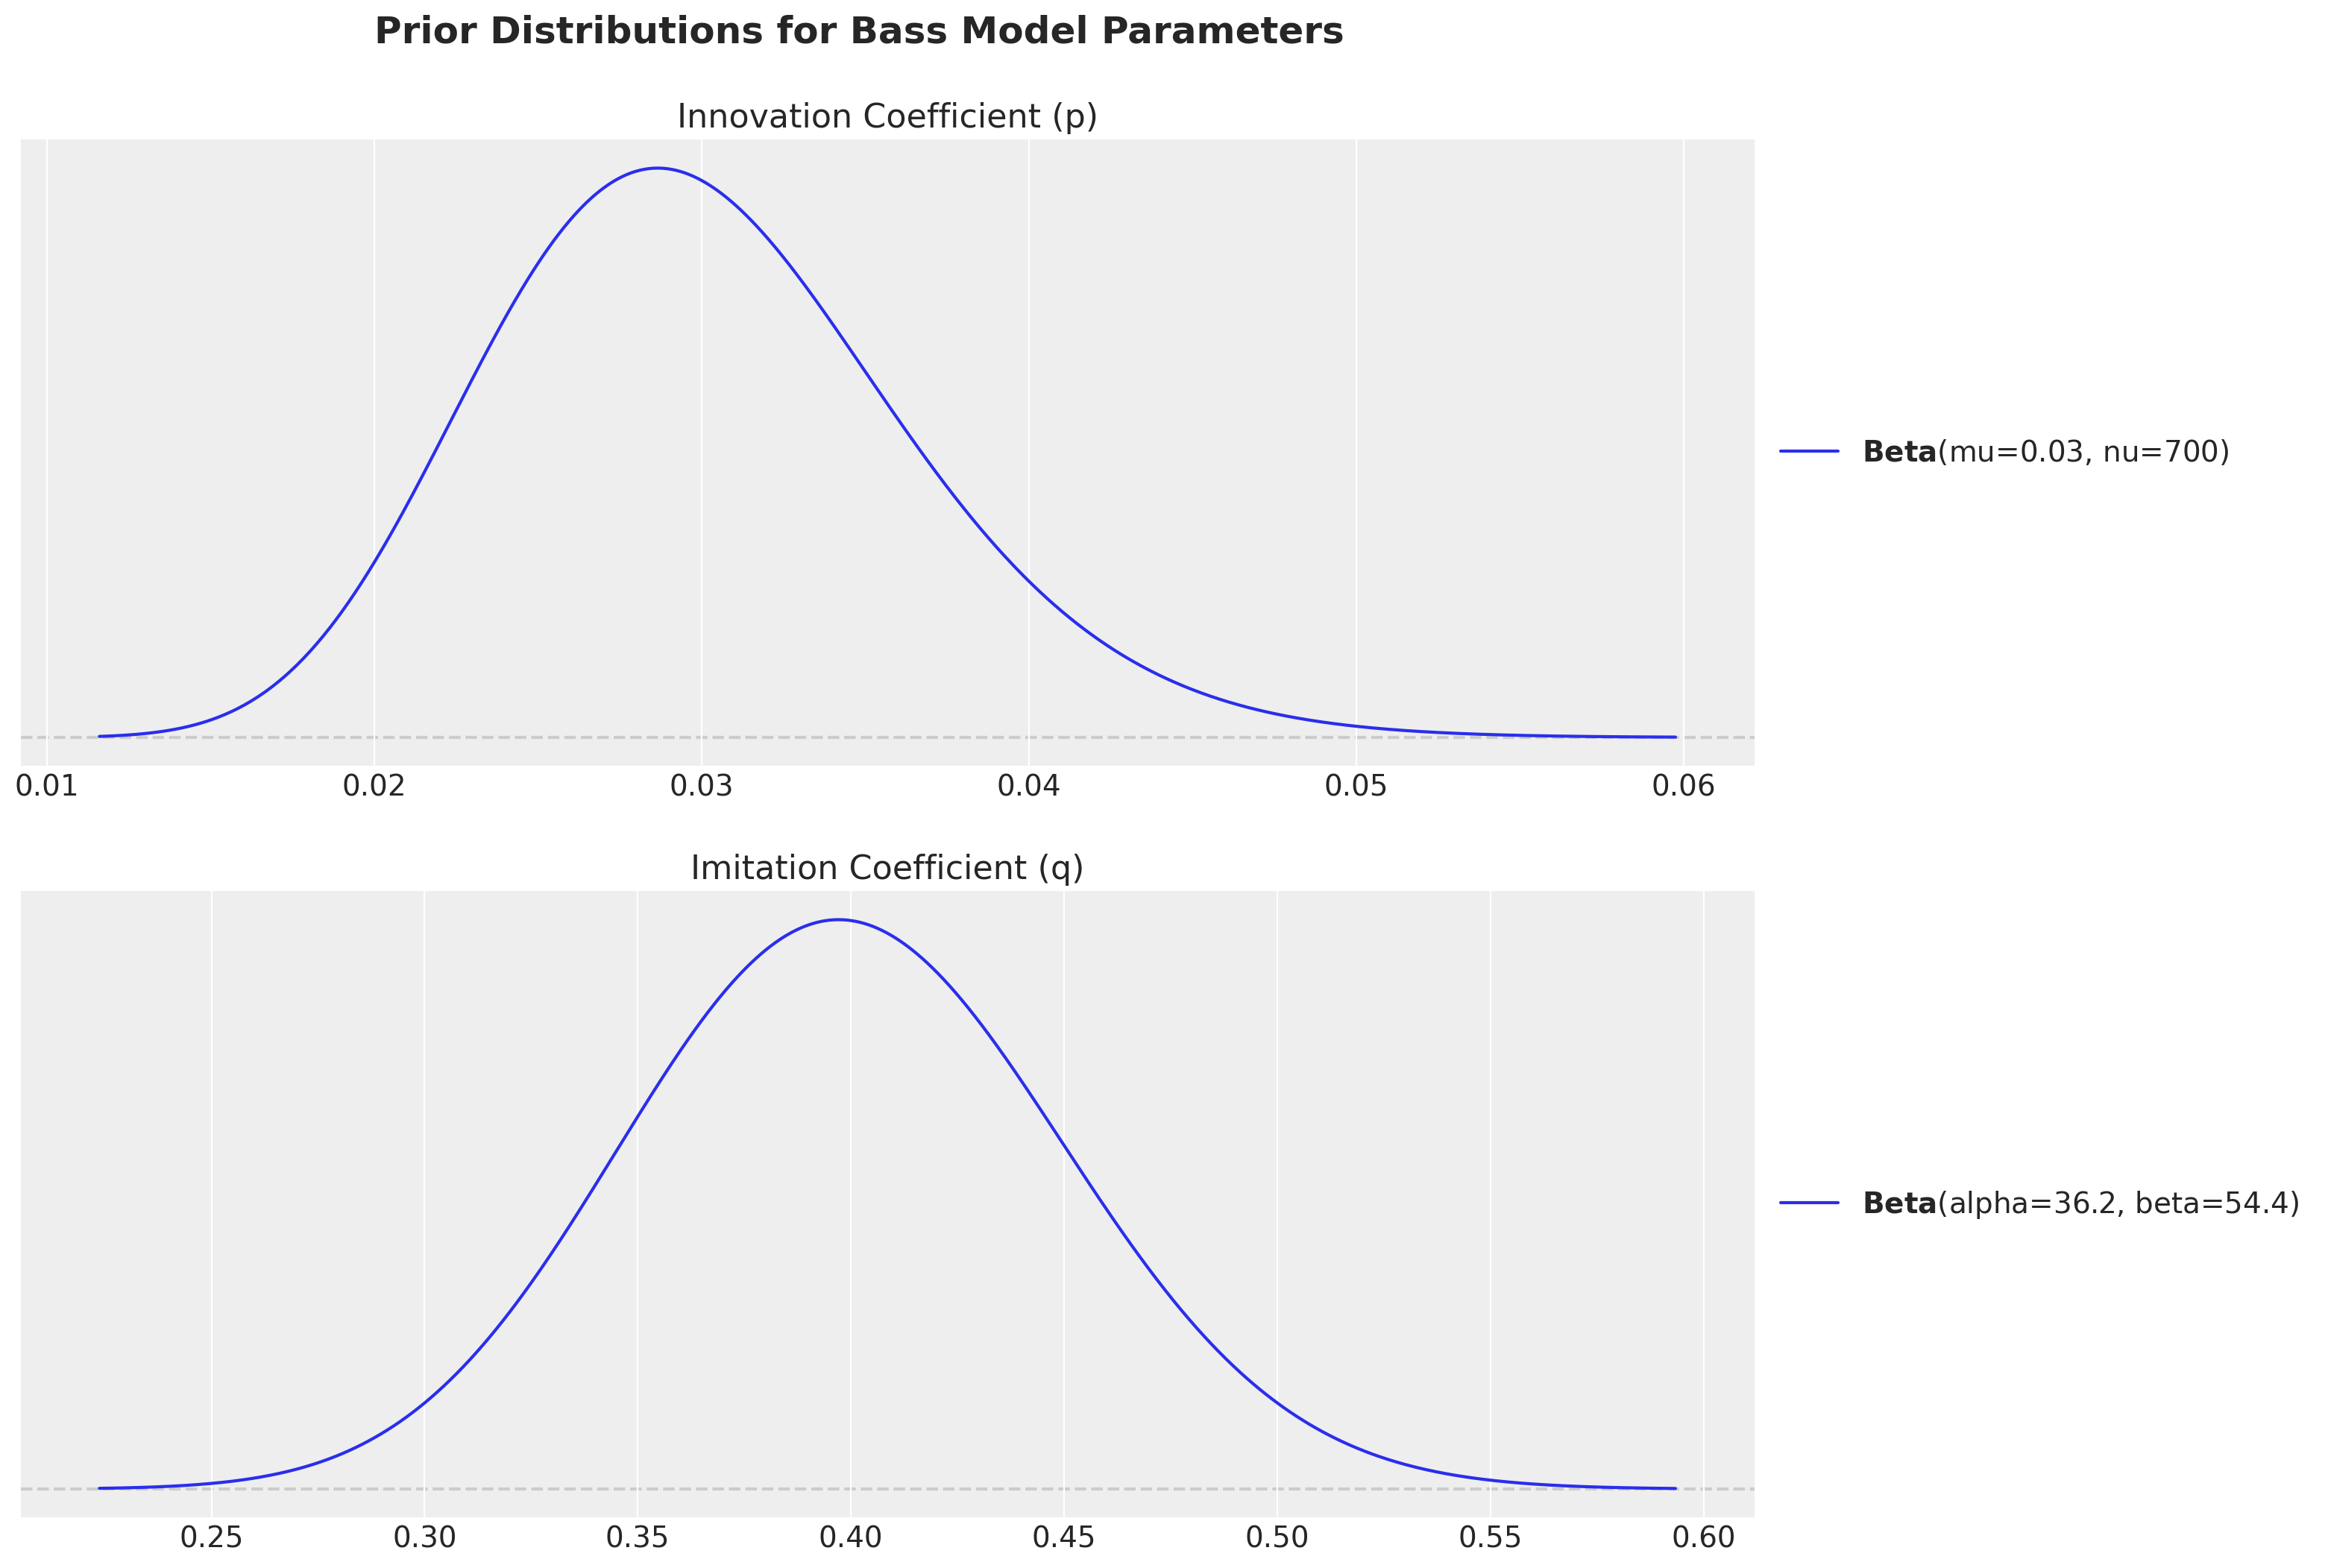

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

priors["p"].preliz.plot_pdf(ax=ax[0])
ax[0].set(title="Innovation Coefficient (p)")
priors["q"].preliz.plot_pdf(ax=ax[1])
ax[1].set(title="Imitation Coefficient (q)")
fig.suptitle(
    "Prior Distributions for Bass Model Parameters",
    fontsize=18,
    fontweight="bold",
    y=0.95,
);

Observe we have chosen the priors within the usual ranges of empirical studies:

- **Innovation coefficient (p)**: Measures external influence like advertising and media - typically $0.01-0.03$
- **Imitation coefficient (q)**: Measures internal influence like word-of-mouth - typically $0.3-0.5$

## Generate Synthetic Data

With the generative Bass model, we can generate a synthetic dataset by sampling from the prior and choosing one particular sample to use as *observed* data. For this purpose we define two auxiliary functions.

In [7]:
def sample_prior_bass_data(model: pm.Model) -> xr.DataArray:
    """Generate a sample from the prior predictive distribution of the Bass model.

    Parameters
    ----------
    model : pymc.Model
        The PyMC model to sample from

    Returns
    -------
    xarray.DataArray
        Simulated adoption data
    """
    with model:
        idata = pm.sample_prior_predictive(random_seed=rng)
    return idata["prior"]["y"].sel(chain=0, draw=0)


def transform_to_actual_dates(bass_data, product_start, possible_dates) -> pd.DataFrame:
    """Transform simulation data from time index to calendar dates.

    Parameters
    ----------
    bass_data : xarray.DataArray
        Simulated bass model data
    product_start : pandas.Series
        Start date for each product
    possible_dates : pandas.DatetimeIndex
        All dates in the simulation period

    Returns
    -------
    pandas.DataFrame
        Adoption data with actual calendar dates
    """
    bass_data = bass_data.to_dataset()
    bass_data["product_start"] = product_start.to_xarray()

    df_bass_data = (
        bass_data.to_dataframe().drop(columns=["chain", "draw"]).reset_index()
    )
    df_bass_data["actual_date"] = df_bass_data["product_start"] + pd.to_timedelta(
        7 * df_bass_data["T"], unit="days"
    )

    return (
        df_bass_data.set_index(["actual_date", "product"])
        .y.unstack(fill_value=0)
        .reindex(possible_dates, fill_value=0)
    )

Now we can generate the observed data:

In [8]:
# Setup simulation parameters
T, possible_dates, _, products, product_start, coords = setup_simulation_parameters()

# Create and configure the Bass model
generative_model = create_bass_model(t=T, coords=coords, observed=None, priors=priors)

# Sample and select one "observed" dataset.
bass_data = sample_prior_bass_data(generative_model)
actual_data = transform_to_actual_dates(bass_data, product_start, possible_dates)

Sampling: [m_unscaled, p, q, y]


The `actual_data` data frame has the typical format of a real dataset.

In [9]:
actual_data

product        P0     P1    P2    P3    P4     P5     P6    P7     P8
2023-01-02      0      0   451     0     0      0      0     0      0
2023-01-09      0      0    56     0     0      0      0     0      0
2023-01-16      0      0  1948     0     0      0      0     0      0
2023-01-23      0      0  3742     0     0      0      0     0      0
2023-01-30      0    239   156     0     0    137      0     0      0
2023-02-06      0   4199  4732     0     0   2208      0     0      0
2023-02-13      0   1646  6477     0     0   1671      0     0      0
2023-02-20      0   1810  2824     0     0    780      0     0      0
2023-02-27      0  17004  2583  1485     0   6002      0     0      0
2023-03-06      0   4956  2508  2679     0   8211      0     0      0
2023-03-13   1277   7956  3255  2340     0   2404      0     0      0
2023-03-20   1403   4926  1030  3838     0   3646      0     0      0
2023-03-27   1818   1091  3145  1443     0  13557      0     0      0
2023-04-03   2865   4696   613    85     0   2857      0     0      0
2023-04-10   1410   8236   717  2858     0   3112      0     0      0
2023-04-17   1472    499    77  3519     0   3920      0     0      0
2023-04-24  11868   1783   340  2431     0   1661      0     0      0
2023-05-01   4669    102   314  8487     0   2908      0     0      0
2023-05-08   3423     61   210  1479     0   2729      0     0      0
2023-05-15   3625   1226    11  1544     0   2125      0     0      0
2023-05-22   1591    256   110   391     0   1164      0     0      0
2023-05-29   3351    149    78  2397     0    849      0     0      0
2023-06-05   1246    205     9   205     0   1060      0     0      0
2023-06-12   1805    106    22   187     0    229      0     0      0
2023-06-19   1353     75    15   131     0     38      0     0      0
2023-06-26    457     48     5   116     0     88      0     0      0
2023-07-03    170     46     8   108     0     79      0     0      0
2023-07-10     44     67     6    57     0     16      0     0      0
2023-07-17    271      8     1    37     0     14      0     0      0
2023-07-24     42      0     1     4     0     19      0     0   2578
2023-07-31     32      6     1     9     0      0      0     0   1418
2023-08-07     93      5     0     3     0     10      0     0   1005
2023-08-14     83      1     1     0     0      4      0     0   2560
2023-08-21     47      0     0     3     0      1      0     0   3666
2023-08-28      8      0     0     1     0      0      0     0  13816
2023-09-04      4      0     0     0     0      0      0  2496   7358
2023-09-11      4      0     0     0     0      0    556  1266   6785
2023-09-18      2      0     0     0     0      3   2151  3637   2370
2023-09-25      2      0     0     0     0      0   4980  1431   1351
2023-10-02      0      1     0     1     0      0   2124   507   2038
2023-10-09      0      0     0     0     0      0  14239  1632   3441
2023-10-16      0      0     0     0     0      0  25224  4681    562
2023-10-23      0      0     0     0     0      0  17233  2095   3801
2023-10-30      0      0     0     0  1042      0   4728  1408    446
2023-11-06      0      0     0     0  1776      0   1890  1890    487
2023-11-13      0      0     0     0  1697      0   1058  3665    673
2023-11-20      0      0     0     0  6648      0    943   391    169
2023-11-27      0      0     0     0  4746      0    605  2720    374
2023-12-04      0      0     0     0  1843      0   1554  1382     98
2023-12-11      0      0     0     0  3598      0   2304   147    151
2023-12-18      0      0     0     0  6576      0    124  2582     42
2023-12-25      0      0     0     0  3610      0    215   110    160

On the other hand, the `bass_data` has the same data as arrays indexed by time (relative) and product.

Let's visualize both.

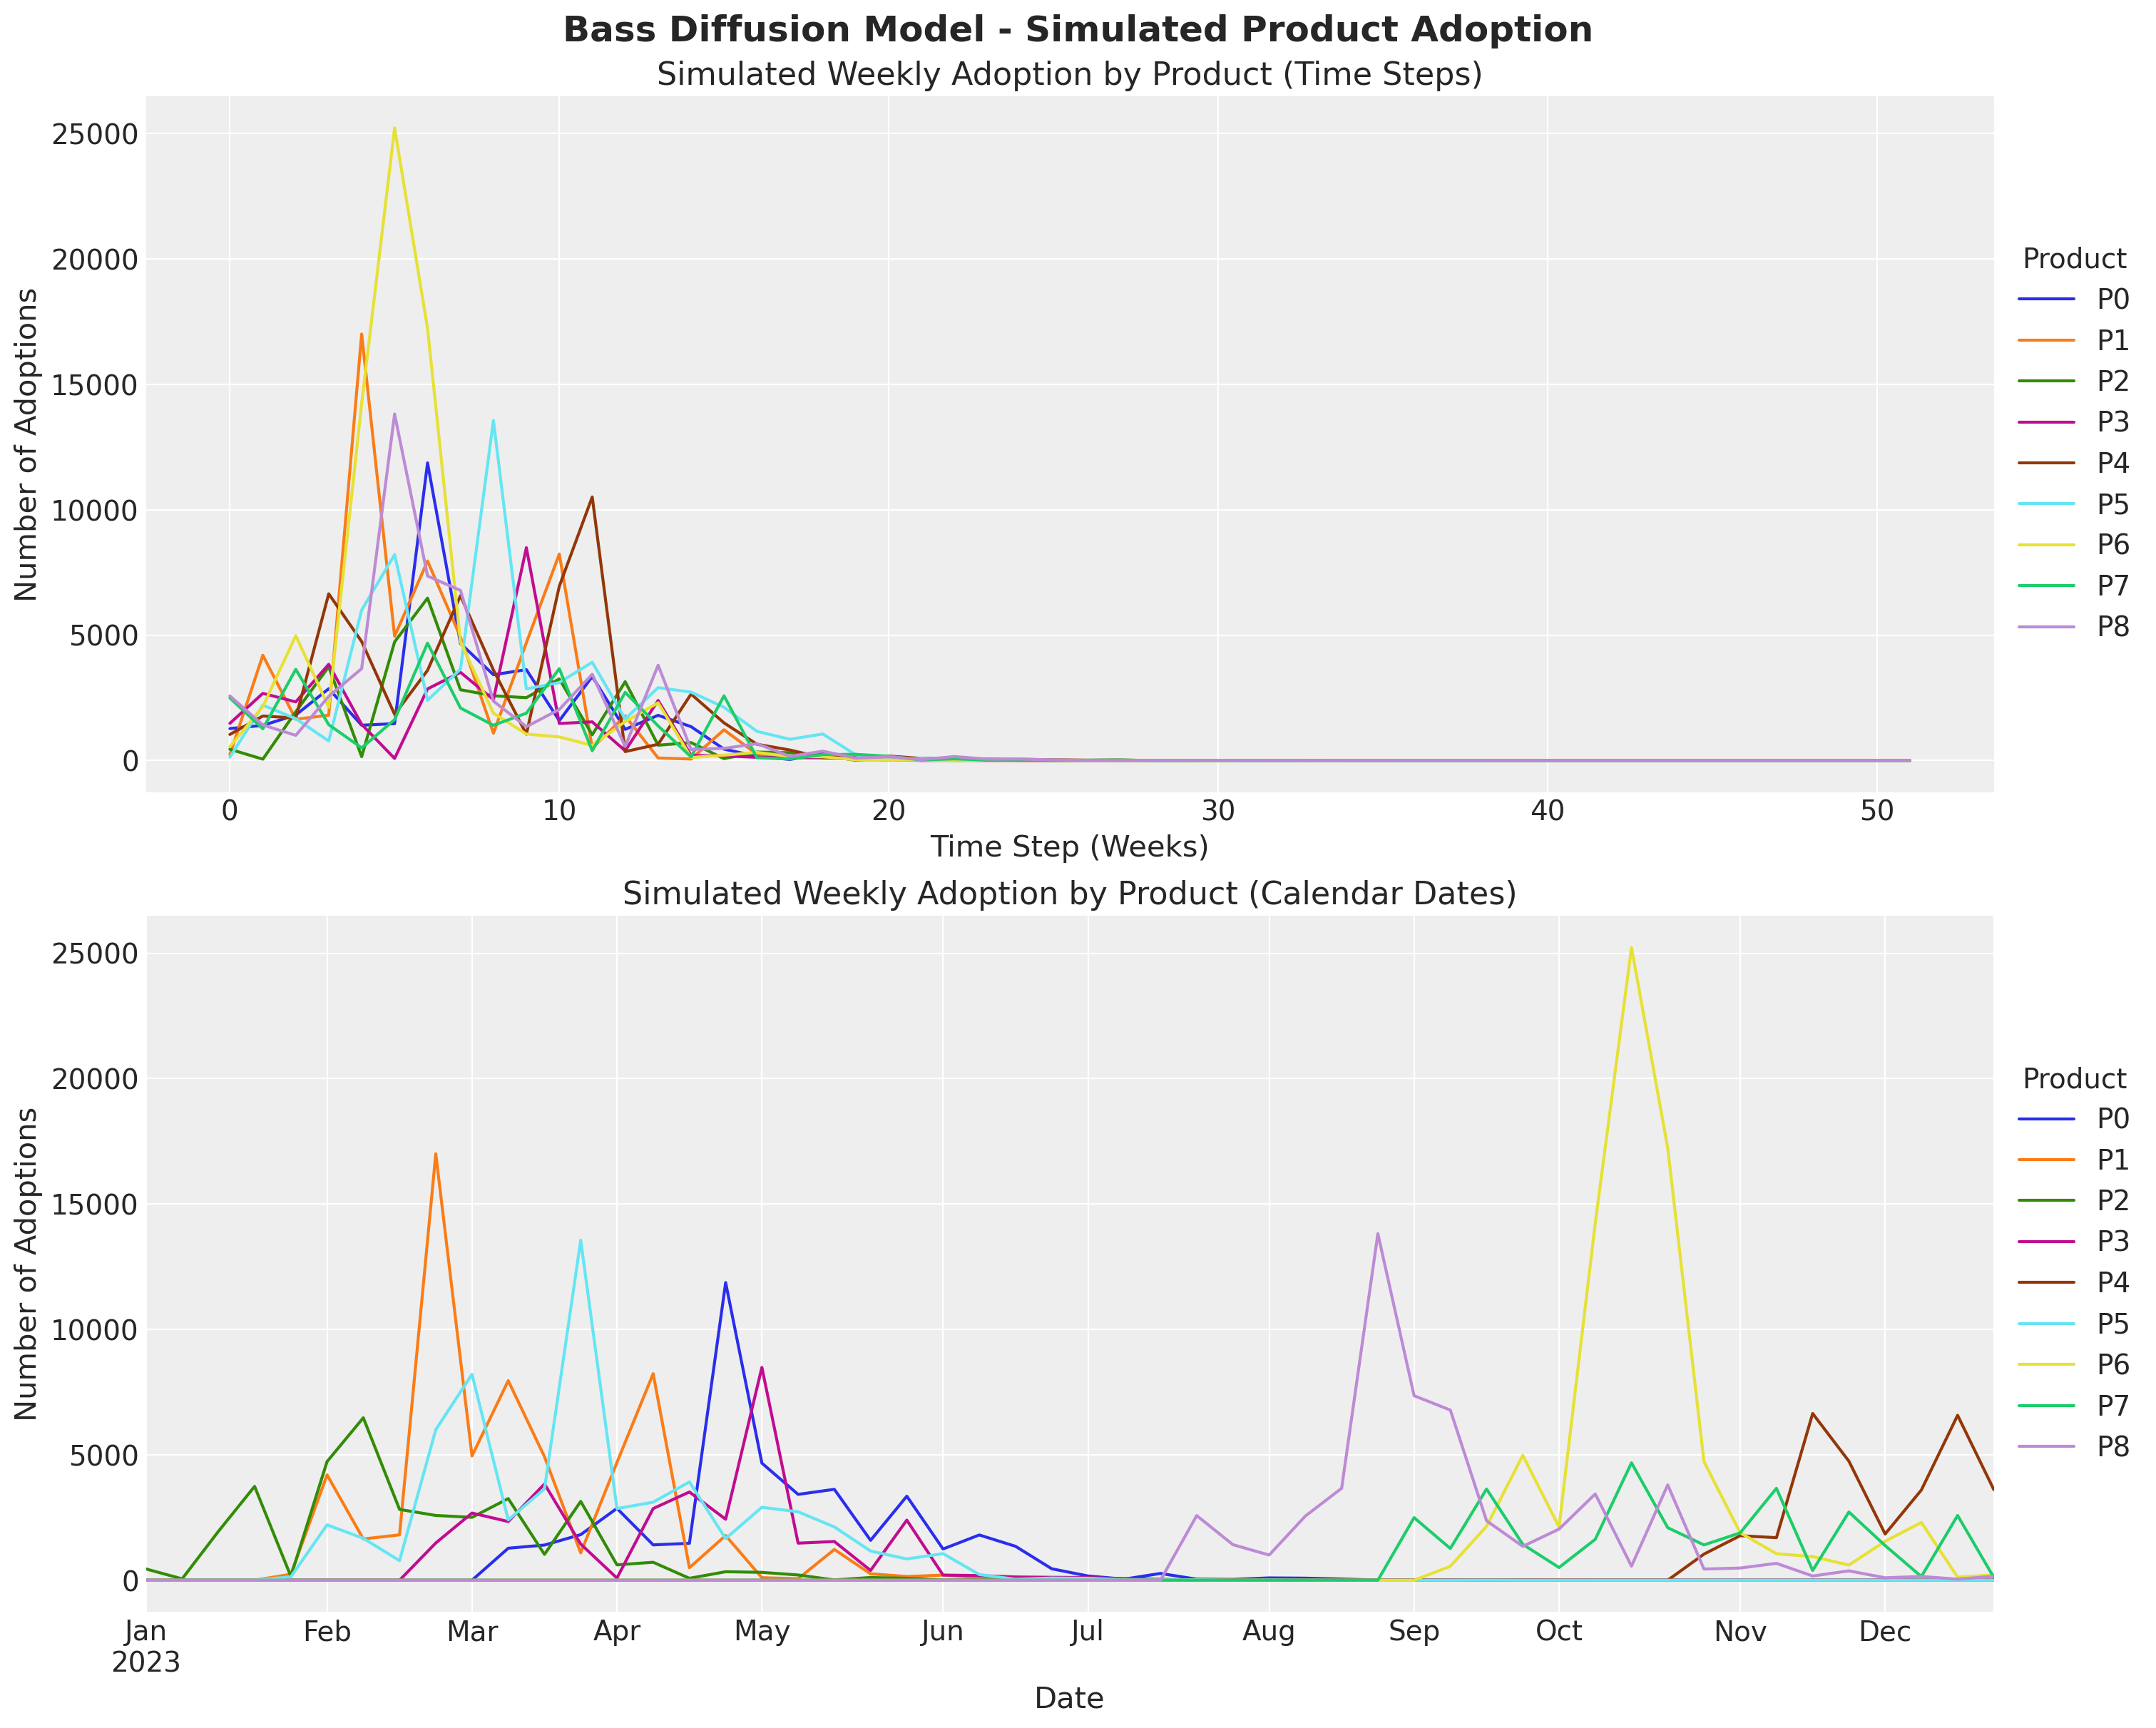

In [10]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(15, 12), sharex=False, sharey=True, layout="constrained"
)

# Plot raw simulated data (by time step)
bass_data.to_series().unstack().plot(ax=ax[0])
ax[0].legend(
    title="Product", title_fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5)
)
ax[0].set(
    title="Simulated Weekly Adoption by Product (Time Steps)",
    xlabel="Time Step (Weeks)",
    ylabel="Number of Adoptions",
)

# Plot data with actual calendar dates
actual_data.plot(ax=ax[1])
ax[1].legend(
    title="Product", title_fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5)
)
ax[1].set(
    title="Simulated Weekly Adoption by Product (Calendar Dates)",
    xlabel="Date",
    ylabel="Number of Adoptions",
)

fig.suptitle(
    "Bass Diffusion Model - Simulated Product Adoption", fontsize=18, fontweight="bold"
);

## Fit the Model

We are now ready to fit the model and generate the posterior predictive distributions.

In [11]:
# We condition the model on observed data.
with pm.observe(generative_model, {"y": bass_data.values}) as model:
    idata = pm.sample(
        tune=1_500,
        draws=2_000,
        chains=4,
        nuts_sampler="nutpie",
        compile_kwargs={"mode": "NUMBA"},
        random_seed=rng,
    )

    idata.extend(
        pm.sample_posterior_predictive(
            idata, model=model, extend_inferencedata=True, random_seed=rng
        )
    )

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:01

We do not have any divergences. Let's look at the summary of the parameters.

In [12]:
az.summary(data=idata, var_names=["p", "q", "m"])

mean        sd     hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
p[P0]      0.026     0.005      0.018      0.036      0.000    0.000   
p[P1]      0.030     0.005      0.020      0.039      0.000    0.000   
p[P2]      0.027     0.005      0.017      0.036      0.000    0.000   
p[P3]      0.030     0.005      0.020      0.040      0.000    0.000   
p[P4]      0.026     0.005      0.018      0.035      0.000    0.000   
p[P5]      0.021     0.004      0.013      0.028      0.000    0.000   
p[P6]      0.032     0.005      0.022      0.042      0.000    0.000   
p[P7]      0.030     0.005      0.020      0.039      0.000    0.000   
p[P8]      0.030     0.005      0.021      0.040      0.000    0.000   
q[P0]      0.402     0.019      0.368      0.439      0.000    0.000   
q[P1]      0.394     0.019      0.360      0.429      0.000    0.000   
q[P2]      0.397     0.019      0.363      0.434      0.000    0.000   
q[P3]      0.450     0.022      0.413      0.493      0.000    0.000   
q[P4]      0.354     0.017      0.324      0.386      0.000    0.000   
q[P5]      0.385     0.018      0.350      0.418      0.000    0.000   
q[P6]      0.430     0.020      0.393      0.468      0.000    0.000   
q[P7]      0.344     0.017      0.311      0.375      0.000    0.000   
q[P8]      0.339     0.017      0.307      0.369      0.000    0.000   
m[P0]  49568.996  4491.414  40760.951  57490.821     41.520   55.743   
m[P1]  51816.841  4487.349  43766.599  60653.332     41.988   55.334   
m[P2]  47118.829  4436.392  39310.947  55843.304     41.551   54.987   
m[P3]  48429.471  4518.438  40231.737  57157.439     41.948   54.340   
m[P4]  51994.167  4501.491  43959.011  60680.809     43.404   54.416   
m[P5]  53276.493  4568.591  45196.257  62426.608     46.587   61.073   
m[P6]  53087.905  4612.168  44525.164  61948.611     45.914   58.424   
m[P7]  47684.913  4315.345  39879.468  55899.426     40.015   50.408   
m[P8]  51232.596  4464.032  42849.916  59268.568     43.671   57.224   

       ess_bulk  ess_tail  r_hat  
p[P0]   10750.0    5899.0    1.0  
p[P1]   11579.0    6089.0    1.0  
p[P2]   11292.0    5970.0    1.0  
p[P3]   12126.0    6250.0    1.0  
p[P4]   12027.0    6287.0    1.0  
p[P5]   10939.0    5817.0    1.0  
p[P6]   11071.0    5834.0    1.0  
p[P7]   12427.0    5130.0    1.0  
p[P8]   11252.0    6353.0    1.0  
q[P0]   10124.0    5923.0    1.0  
q[P1]   10431.0    6172.0    1.0  
q[P2]   11818.0    6179.0    1.0  
q[P3]   12285.0    6374.0    1.0  
q[P4]   11480.0    6068.0    1.0  
q[P5]    9830.0    5566.0    1.0  
q[P6]   12521.0    6256.0    1.0  
q[P7]   12231.0    5460.0    1.0  
q[P8]   10948.0    6146.0    1.0  
m[P0]   11720.0    5933.0    1.0  
m[P1]   11242.0    5793.0    1.0  
m[P2]   11186.0    5118.0    1.0  
m[P3]   11472.0    5854.0    1.0  
m[P4]   10713.0    5973.0    1.0  
m[P5]    9433.0    5492.0    1.0  
m[P6]   10125.0    5873.0    1.0  
m[P7]   11727.0    6210.0    1.0  
m[P8]   10498.0    5213.0    1.0

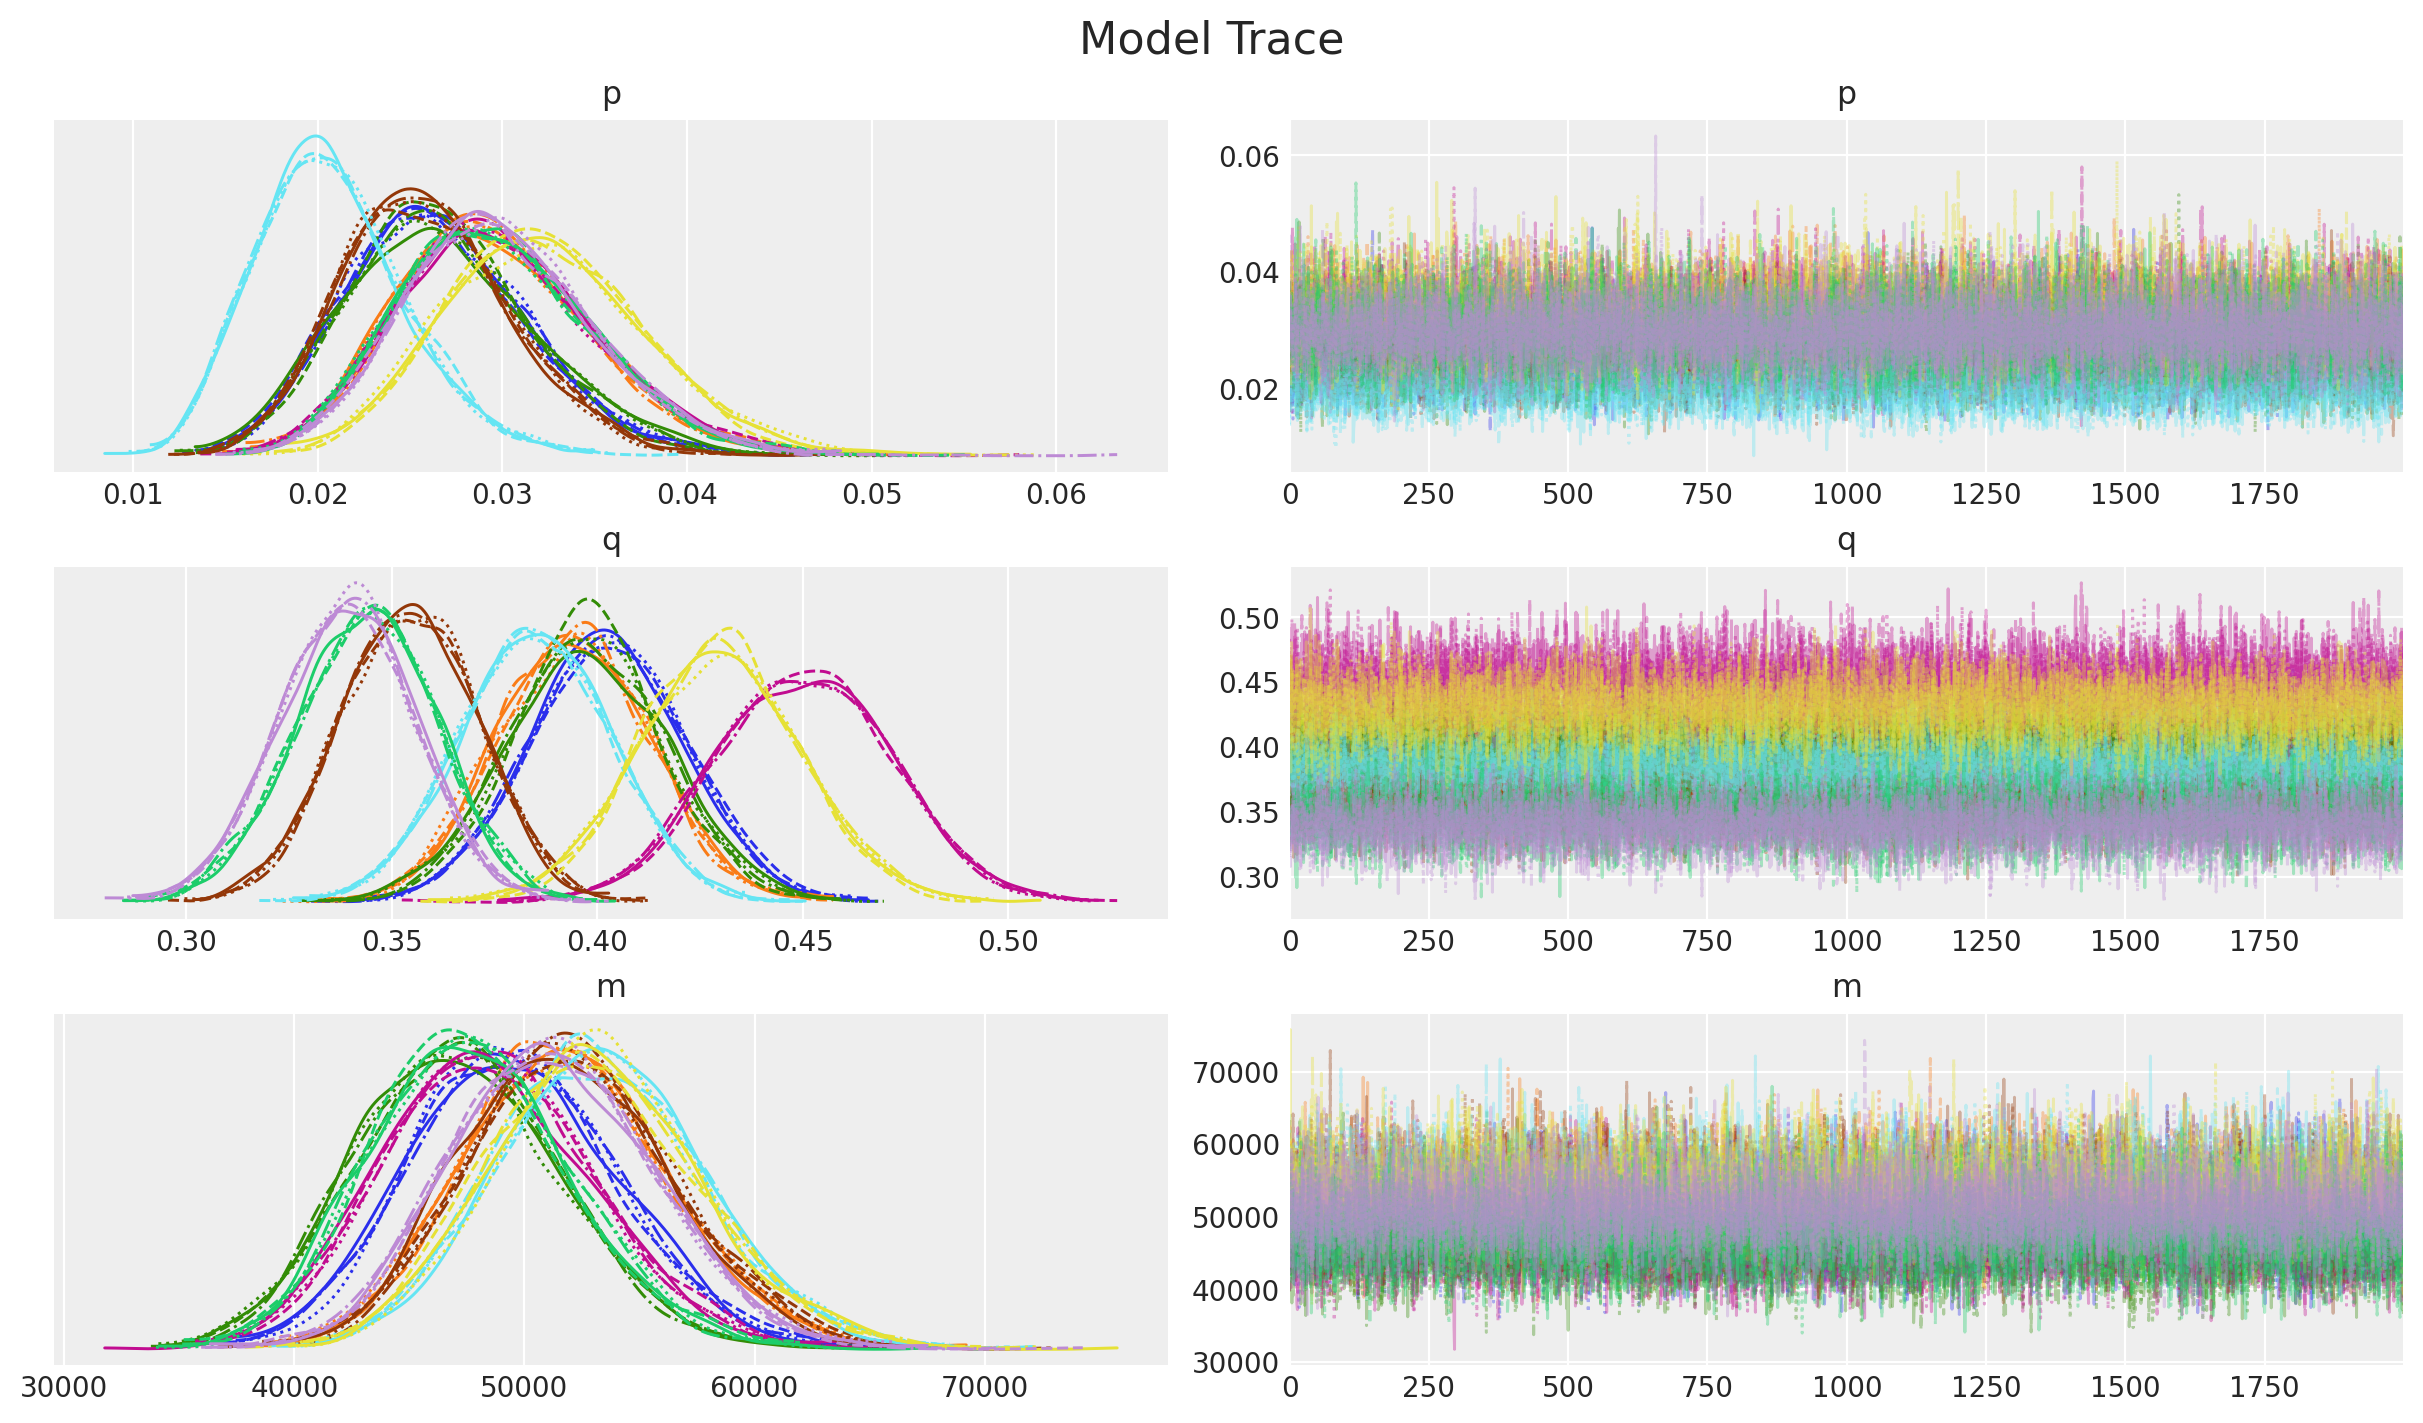

In [13]:
_ = az.plot_trace(
    data=idata,
    var_names=["p", "q", "m"],
    compact=True,
    backend_kwargs={"figsize": (12, 7), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16);

Overall, the diagnostics and trace look good.

Next, we look into the posterior distributions of the parameters.

Text(0.5, 0.98, 'Innovation Coefficient (p)')

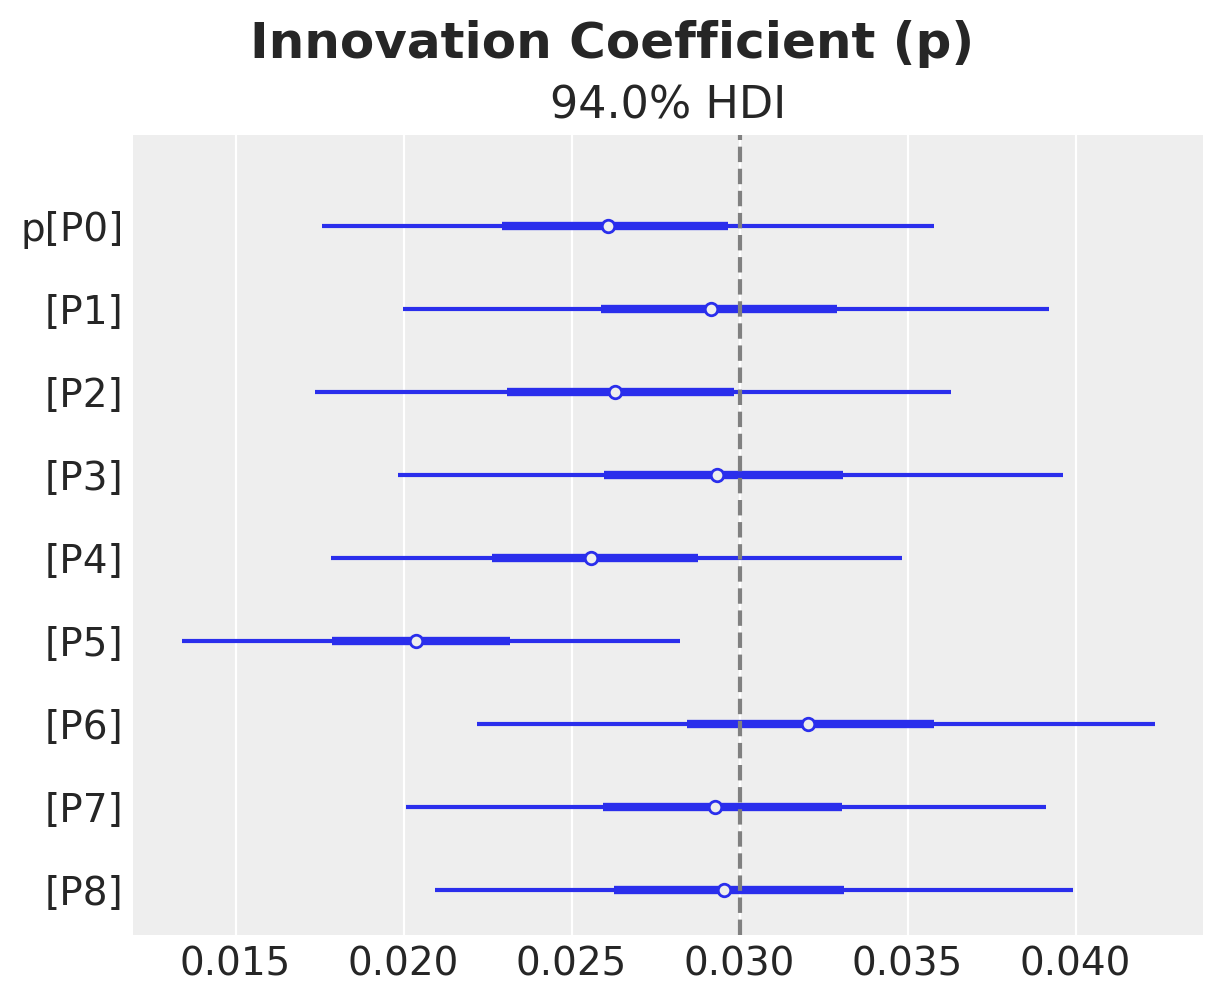

In [14]:
ax, *_ = az.plot_forest(idata["posterior"]["p"], combined=True)
ax.axvline(x=priors["p"].parameters["mu"], color="gray", linestyle="--")
ax.get_figure().suptitle("Innovation Coefficient (p)", fontsize=18, fontweight="bold")

Text(0.5, 0.98, 'Imitation Coefficient (q)')

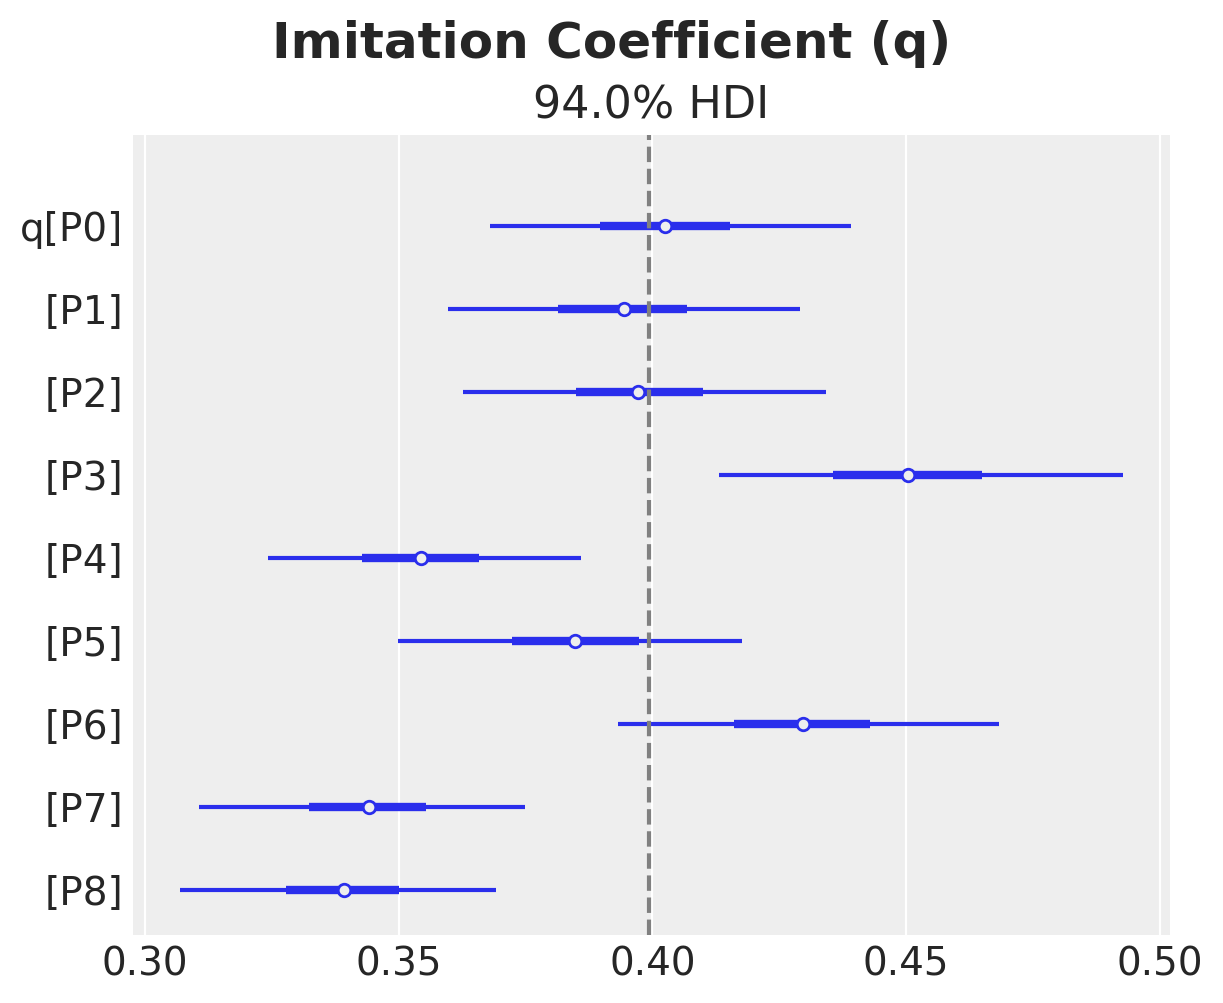

In [15]:
ax, *_ = az.plot_forest(idata["posterior"]["q"], combined=True)
ax.axvline(x=priors["q"].preliz.mean(), color="gray", linestyle="--")
ax.get_figure().suptitle("Imitation Coefficient (q)", fontsize=18, fontweight="bold")

We do see some heterogeneity in the parameters, but overall they are centered around the true values (from the generative model).

## Examining Posterior Predictions for Specific Products

Let's look at the posterior predictive distributions  to see how well our model captures the simulated data.

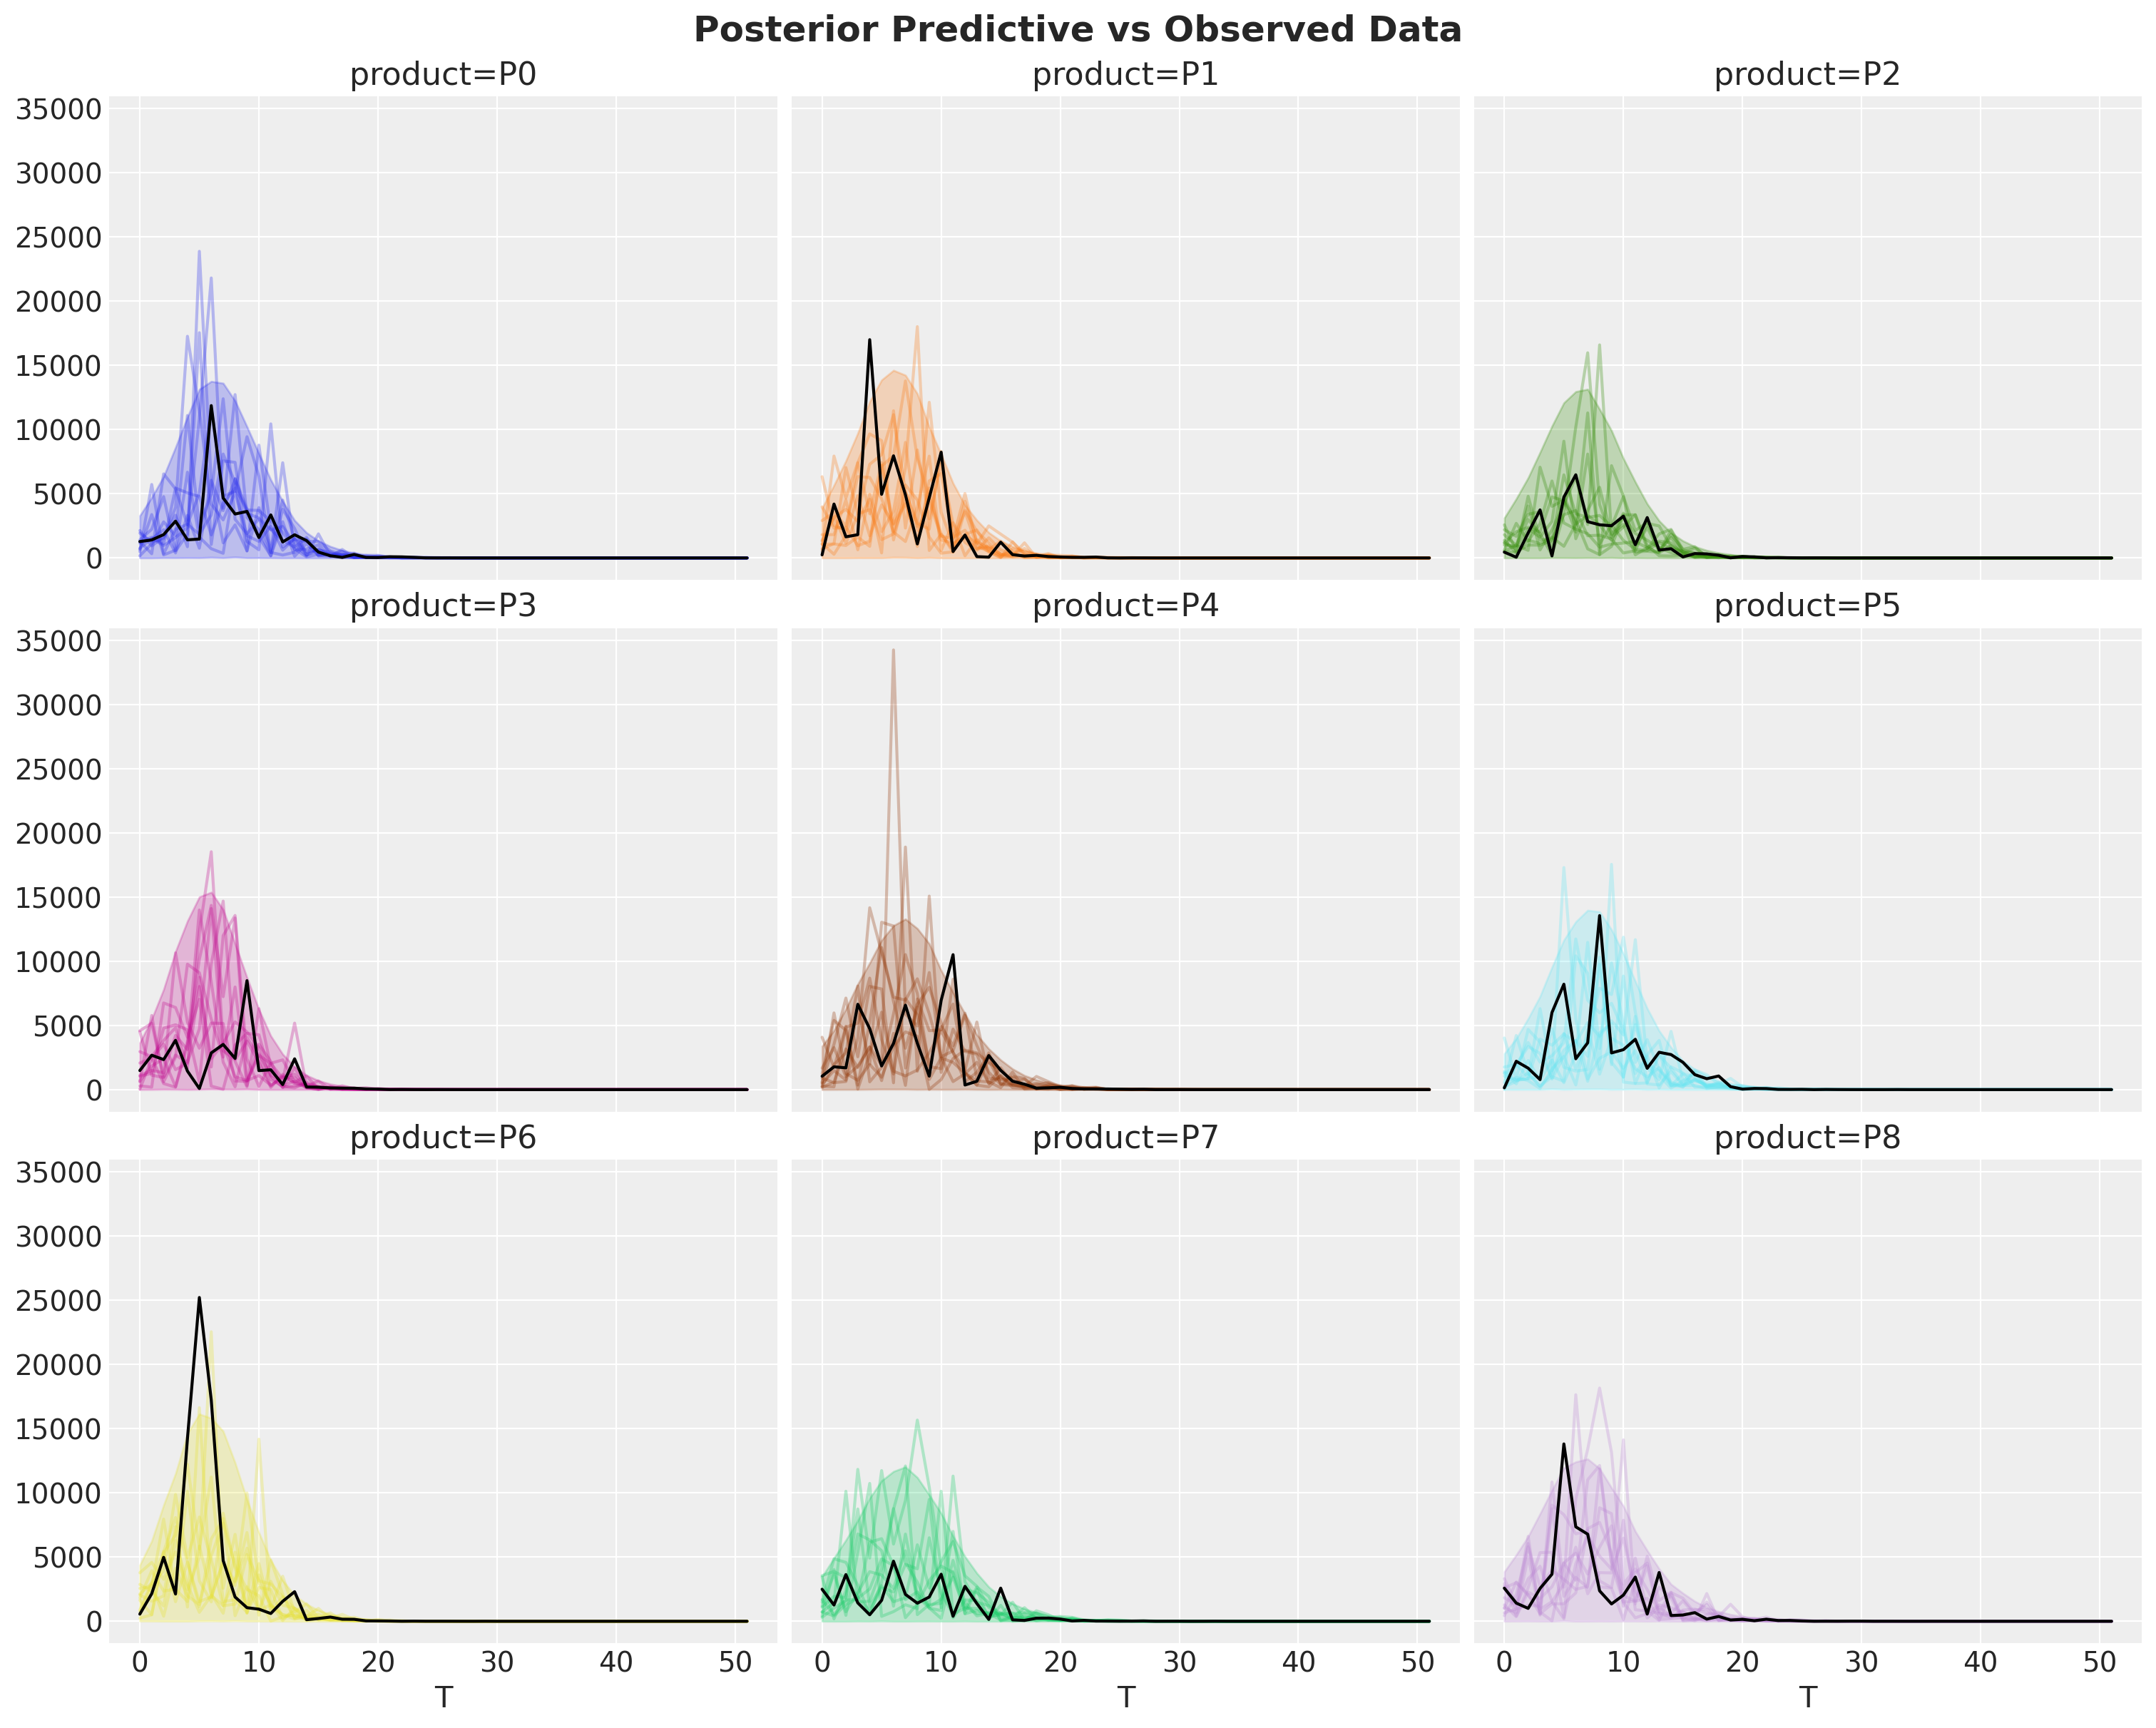

In [16]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior_predictive"]["y"].pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i], color="black")

fig.suptitle("Posterior Predictive vs Observed Data", fontsize=18, fontweight="bold");

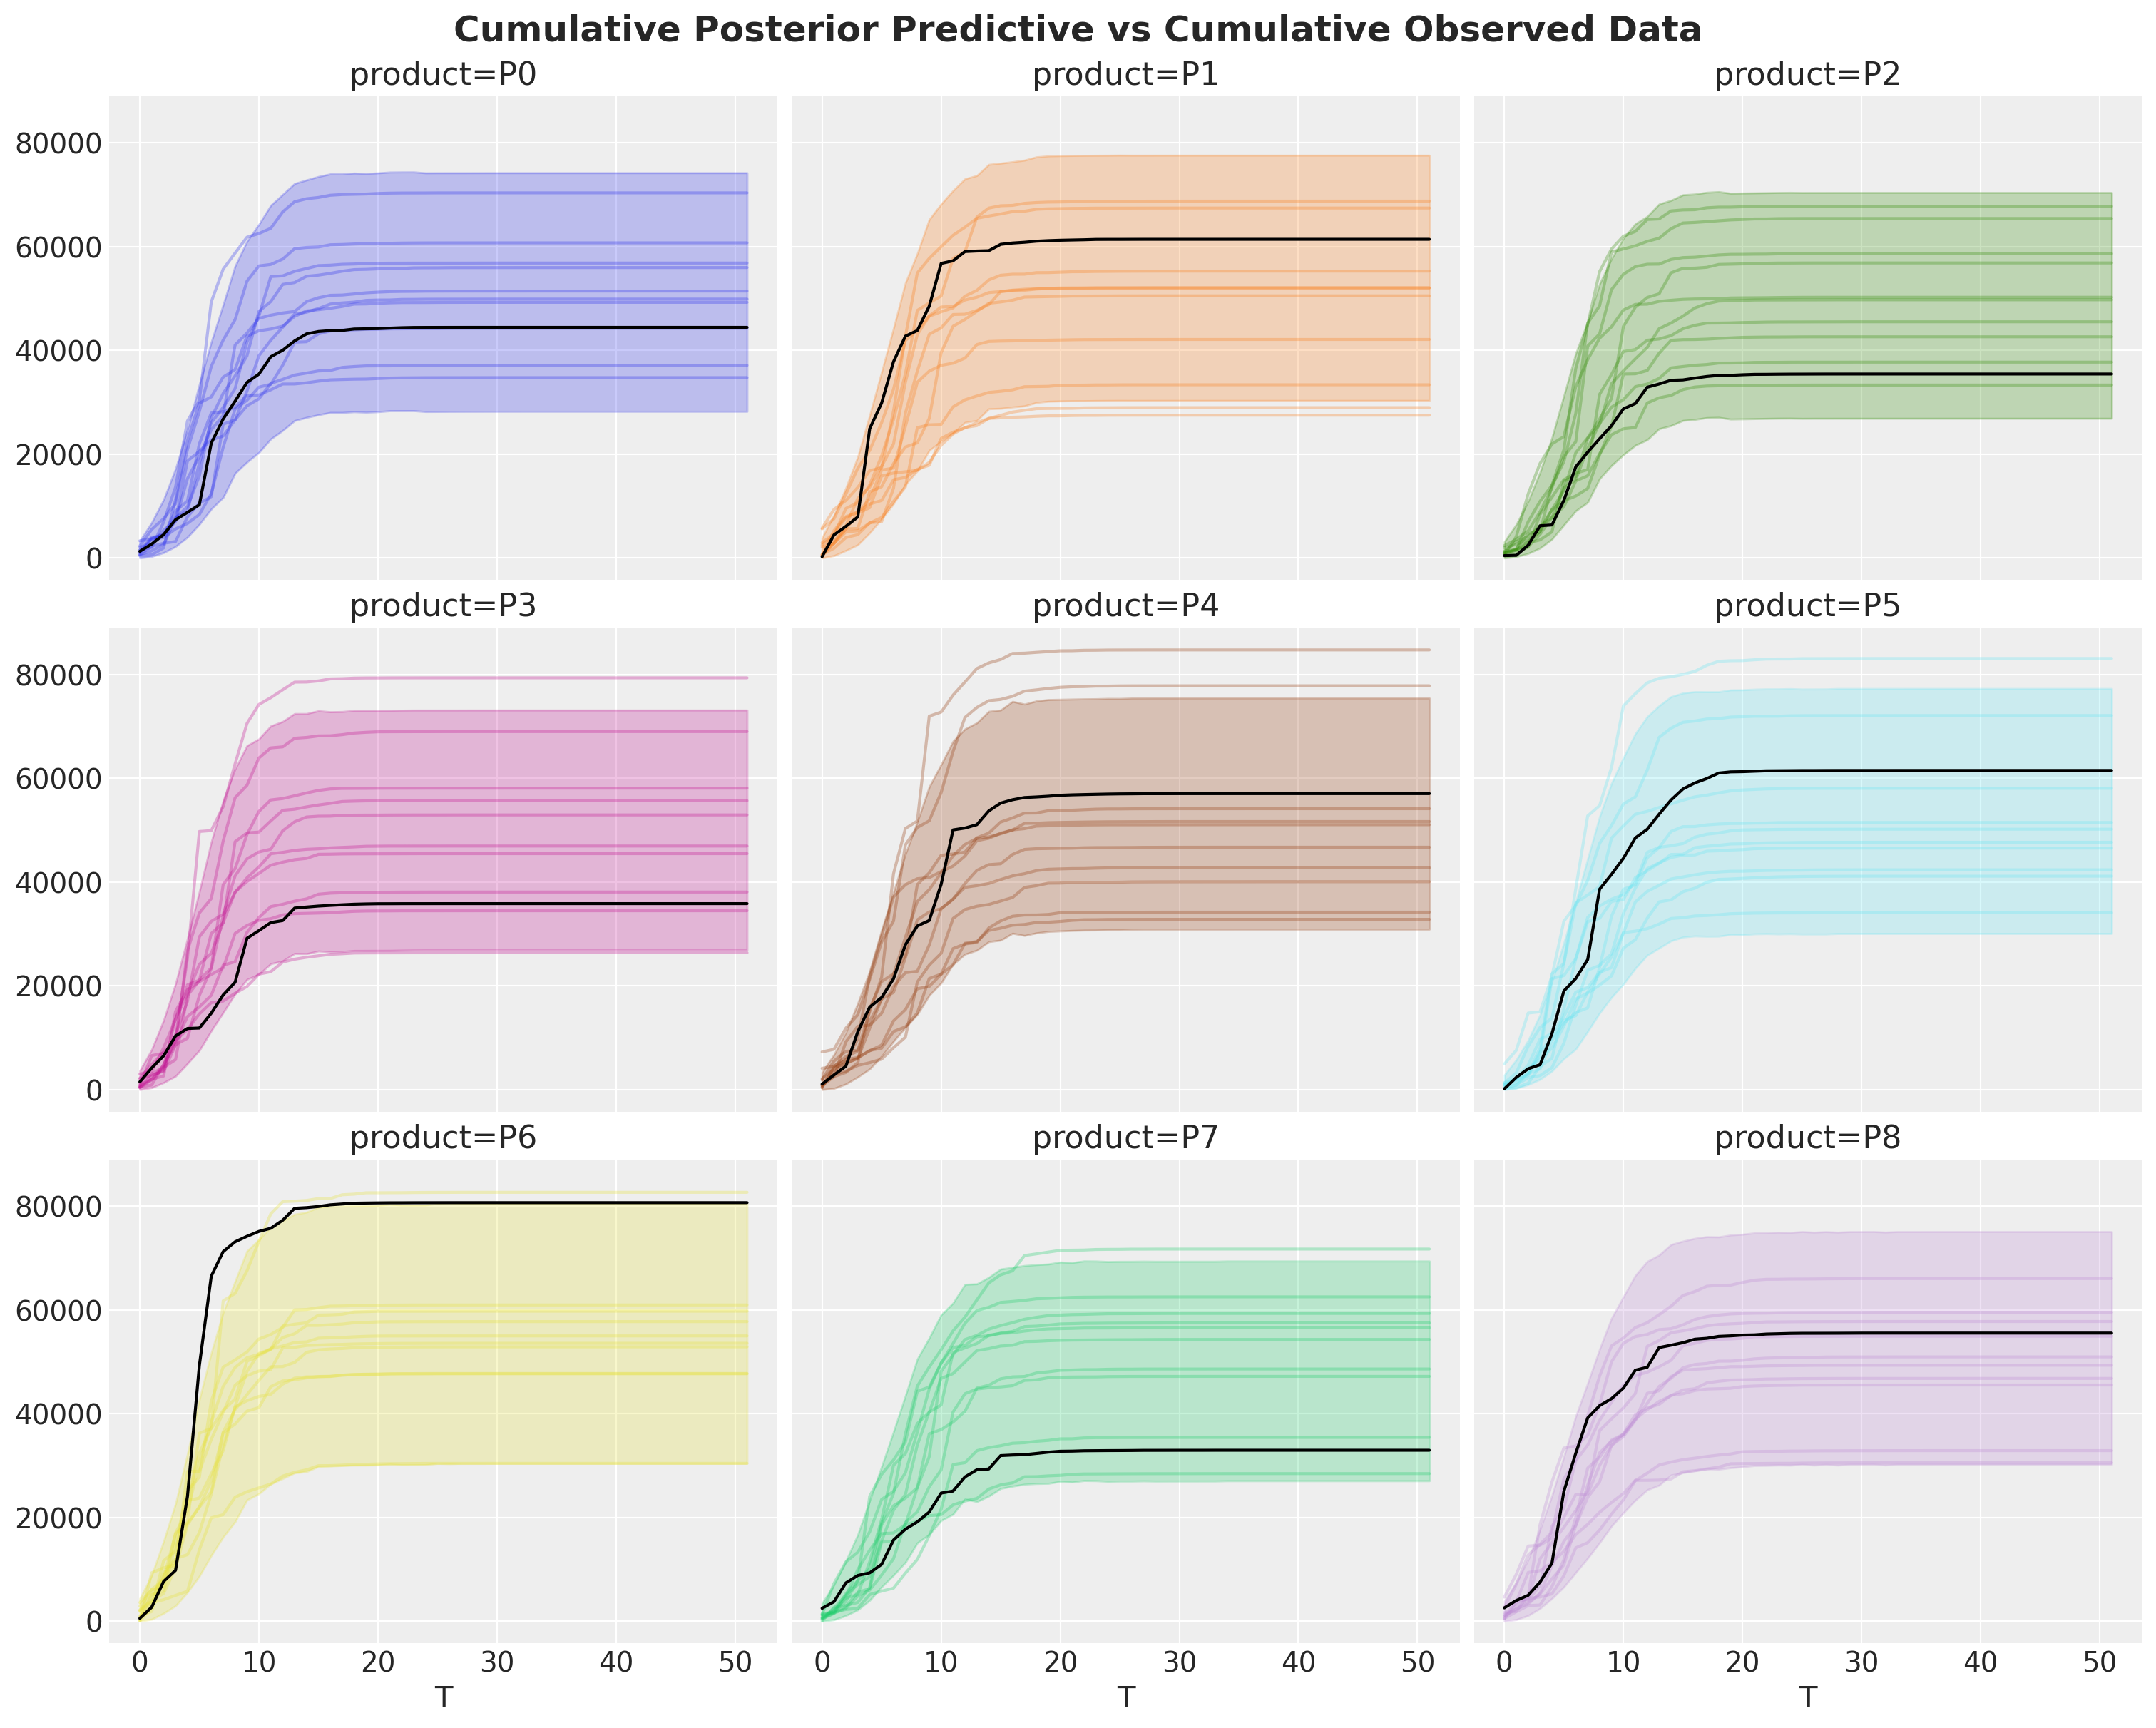

In [17]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior_predictive"]["y"].cumsum(dim="T").pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle(
    "Cumulative Posterior Predictive vs Cumulative Observed Data",
    fontsize=18,
    fontweight="bold",
);

Overall, the model does a good job of capturing the data.

Next, we look into the *adopters*, which represent the expected value of the likelihood.

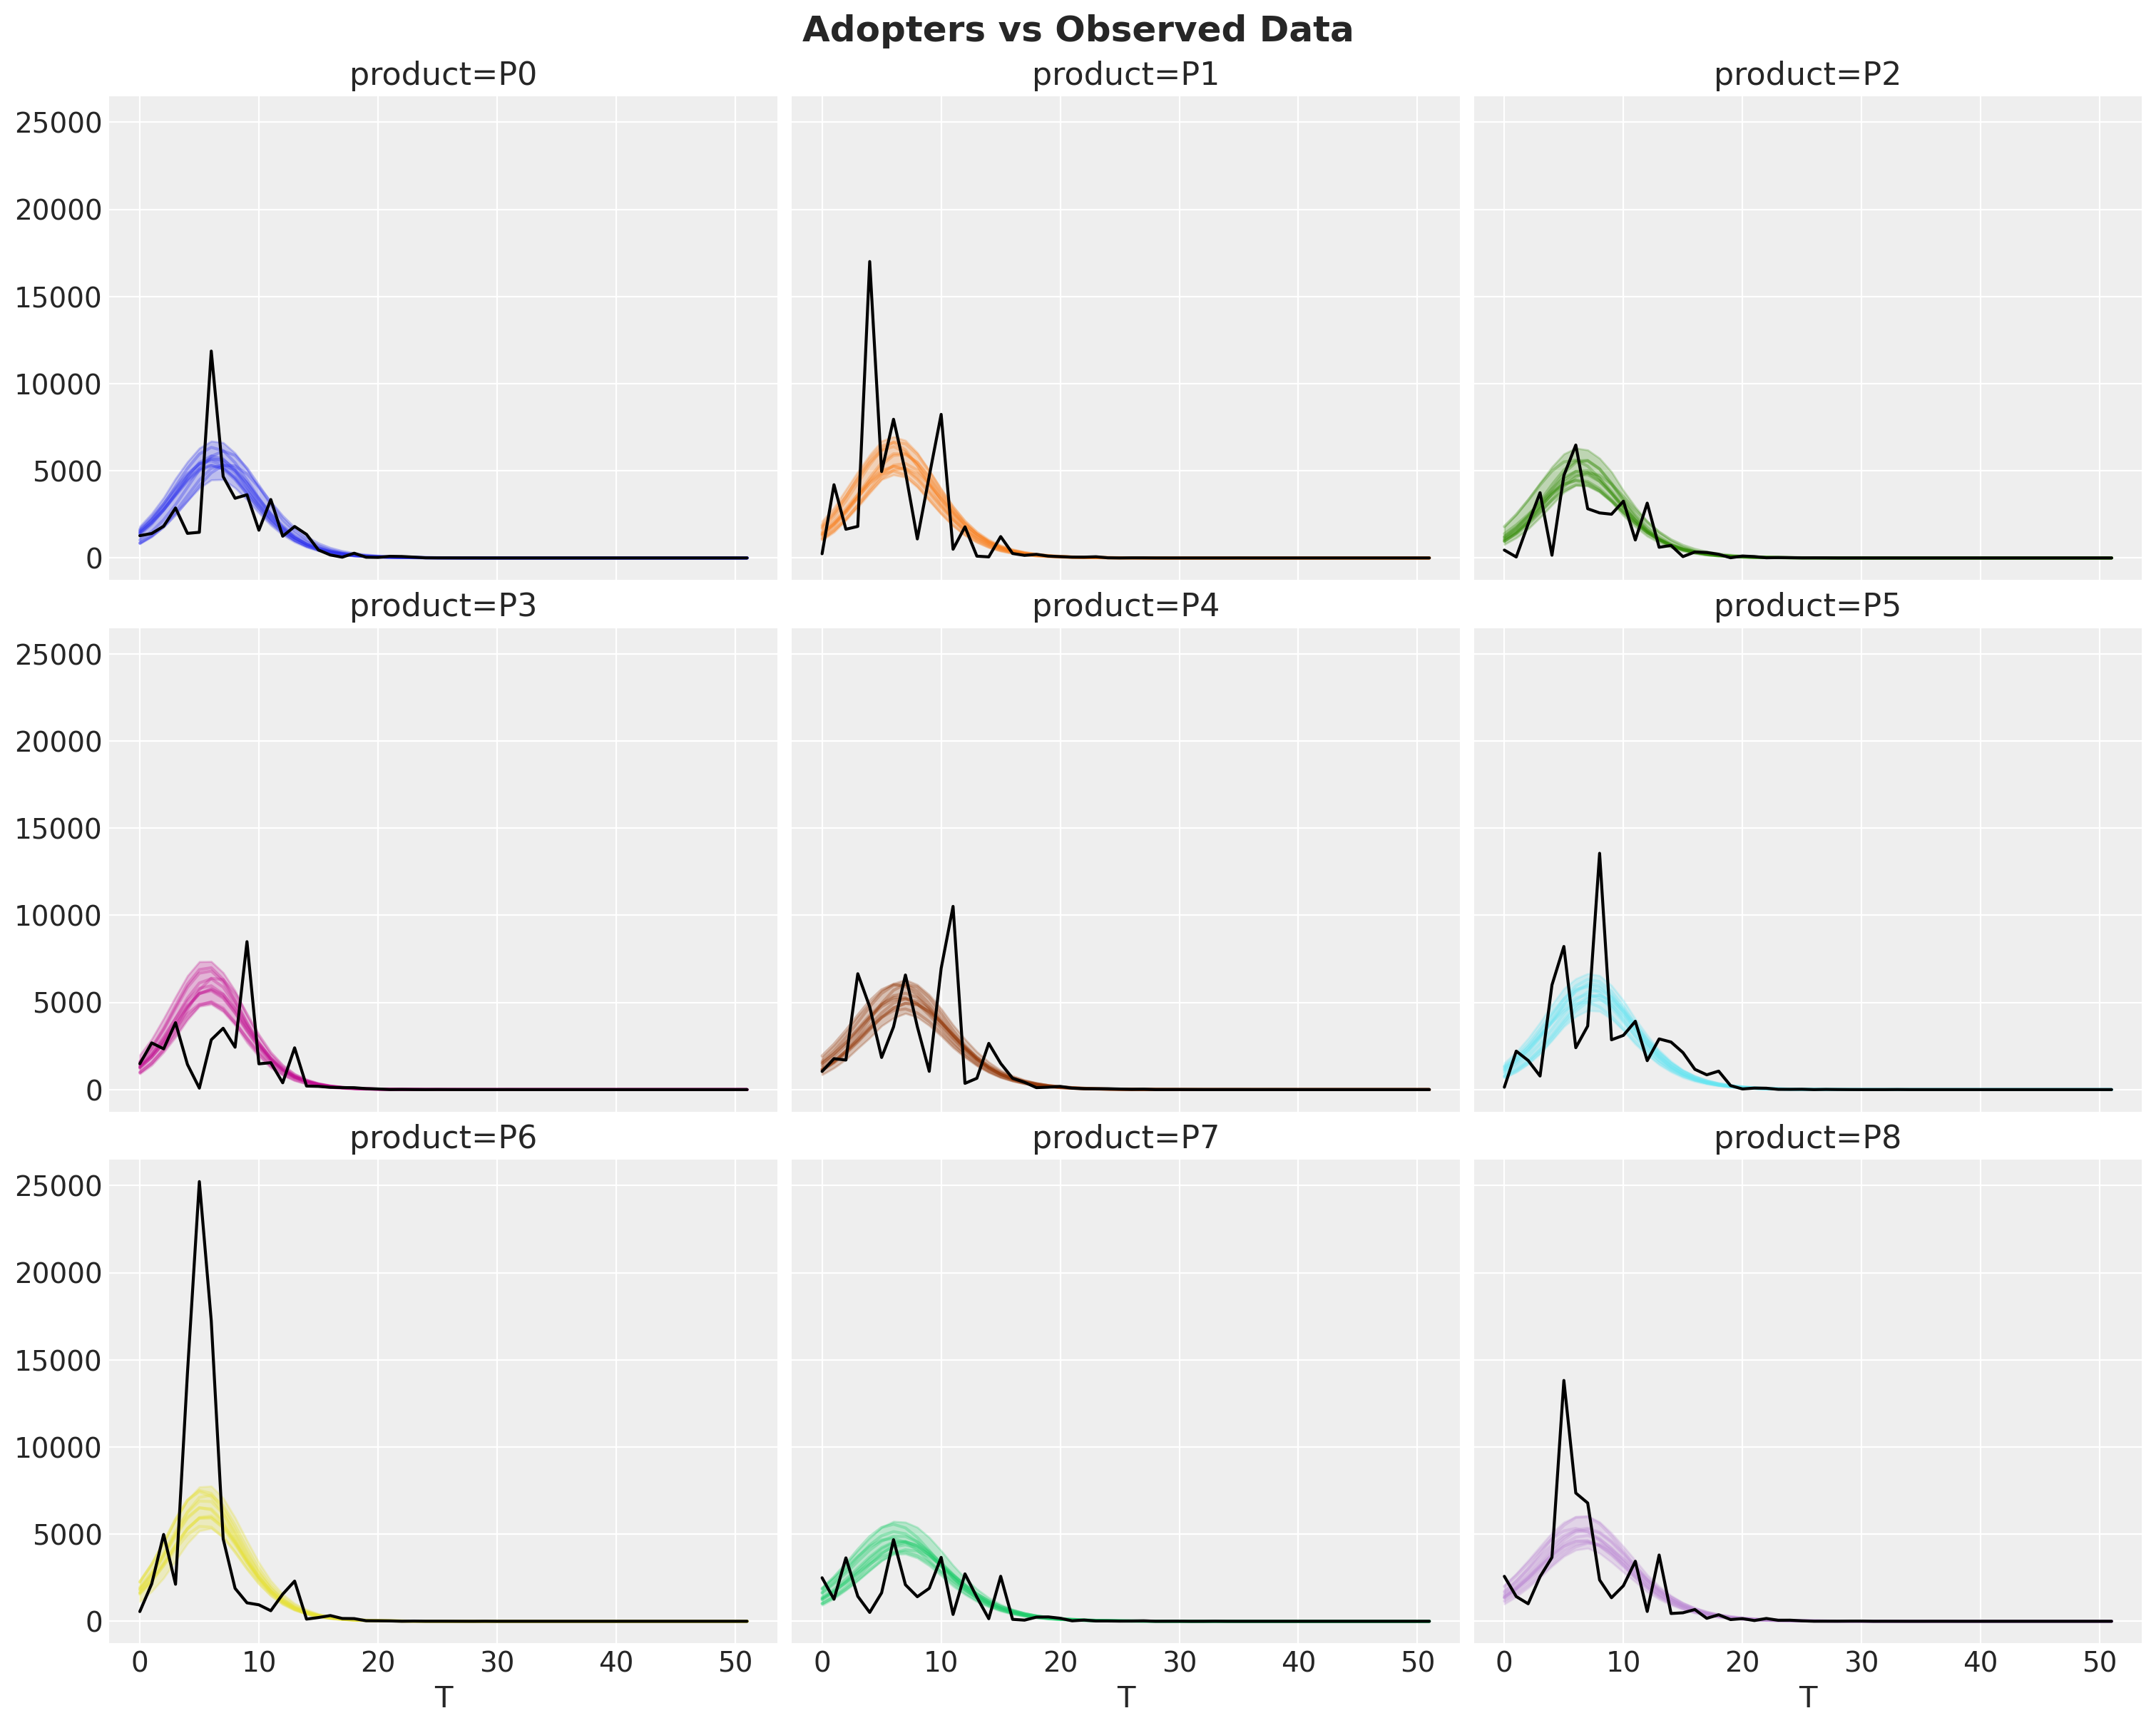

In [18]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i], color="black")

fig.suptitle("Adopters vs Observed Data", fontsize=18, fontweight="bold");

This show the fit is indeed quite reasonable.

We can also evaluate the model goodness by looking into the cumulative data:

```{note}
Remember that the adopters is the mean of the distribution so we see some cumulative curves above and some below.

Look at the `idata["posterior_predictive"]["y"]` for the observed data.
```

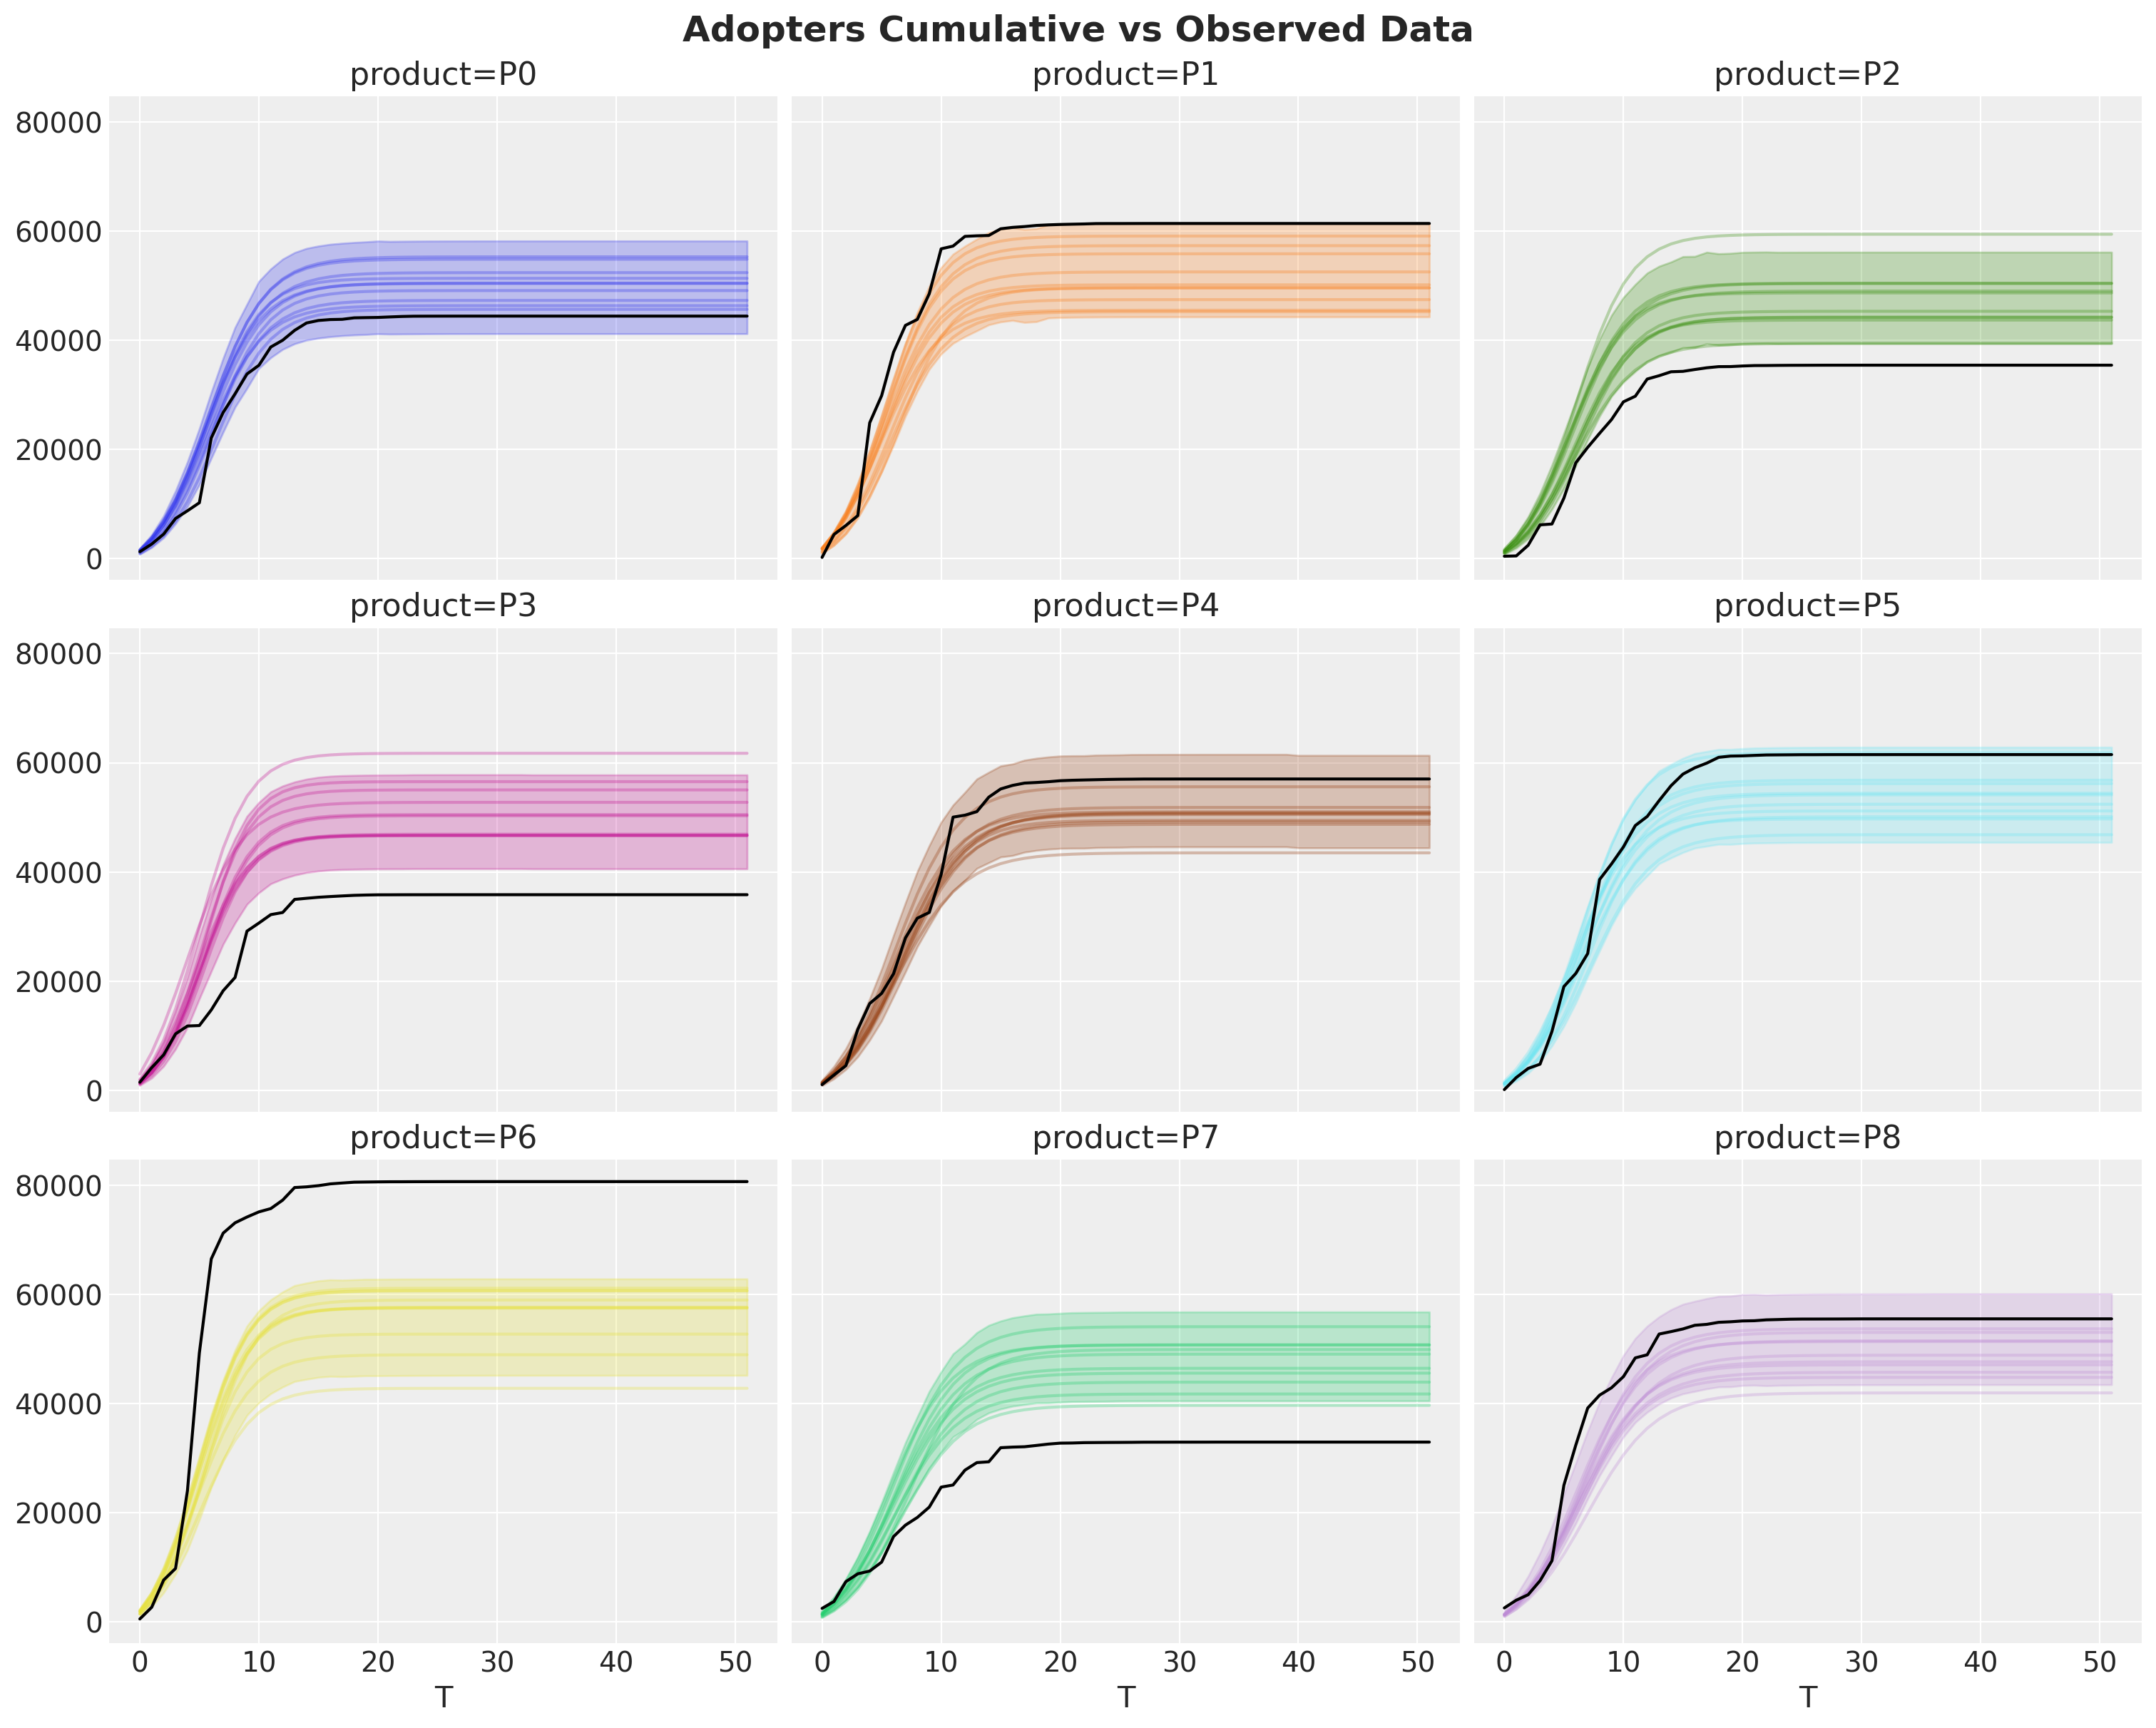

In [19]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].cumsum(dim="T").pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle("Adopters Cumulative vs Observed Data", fontsize=18, fontweight="bold");

We can enhance this view by looking into the components of the model: *innovators* and *imitators* (in orange and green, respectively).

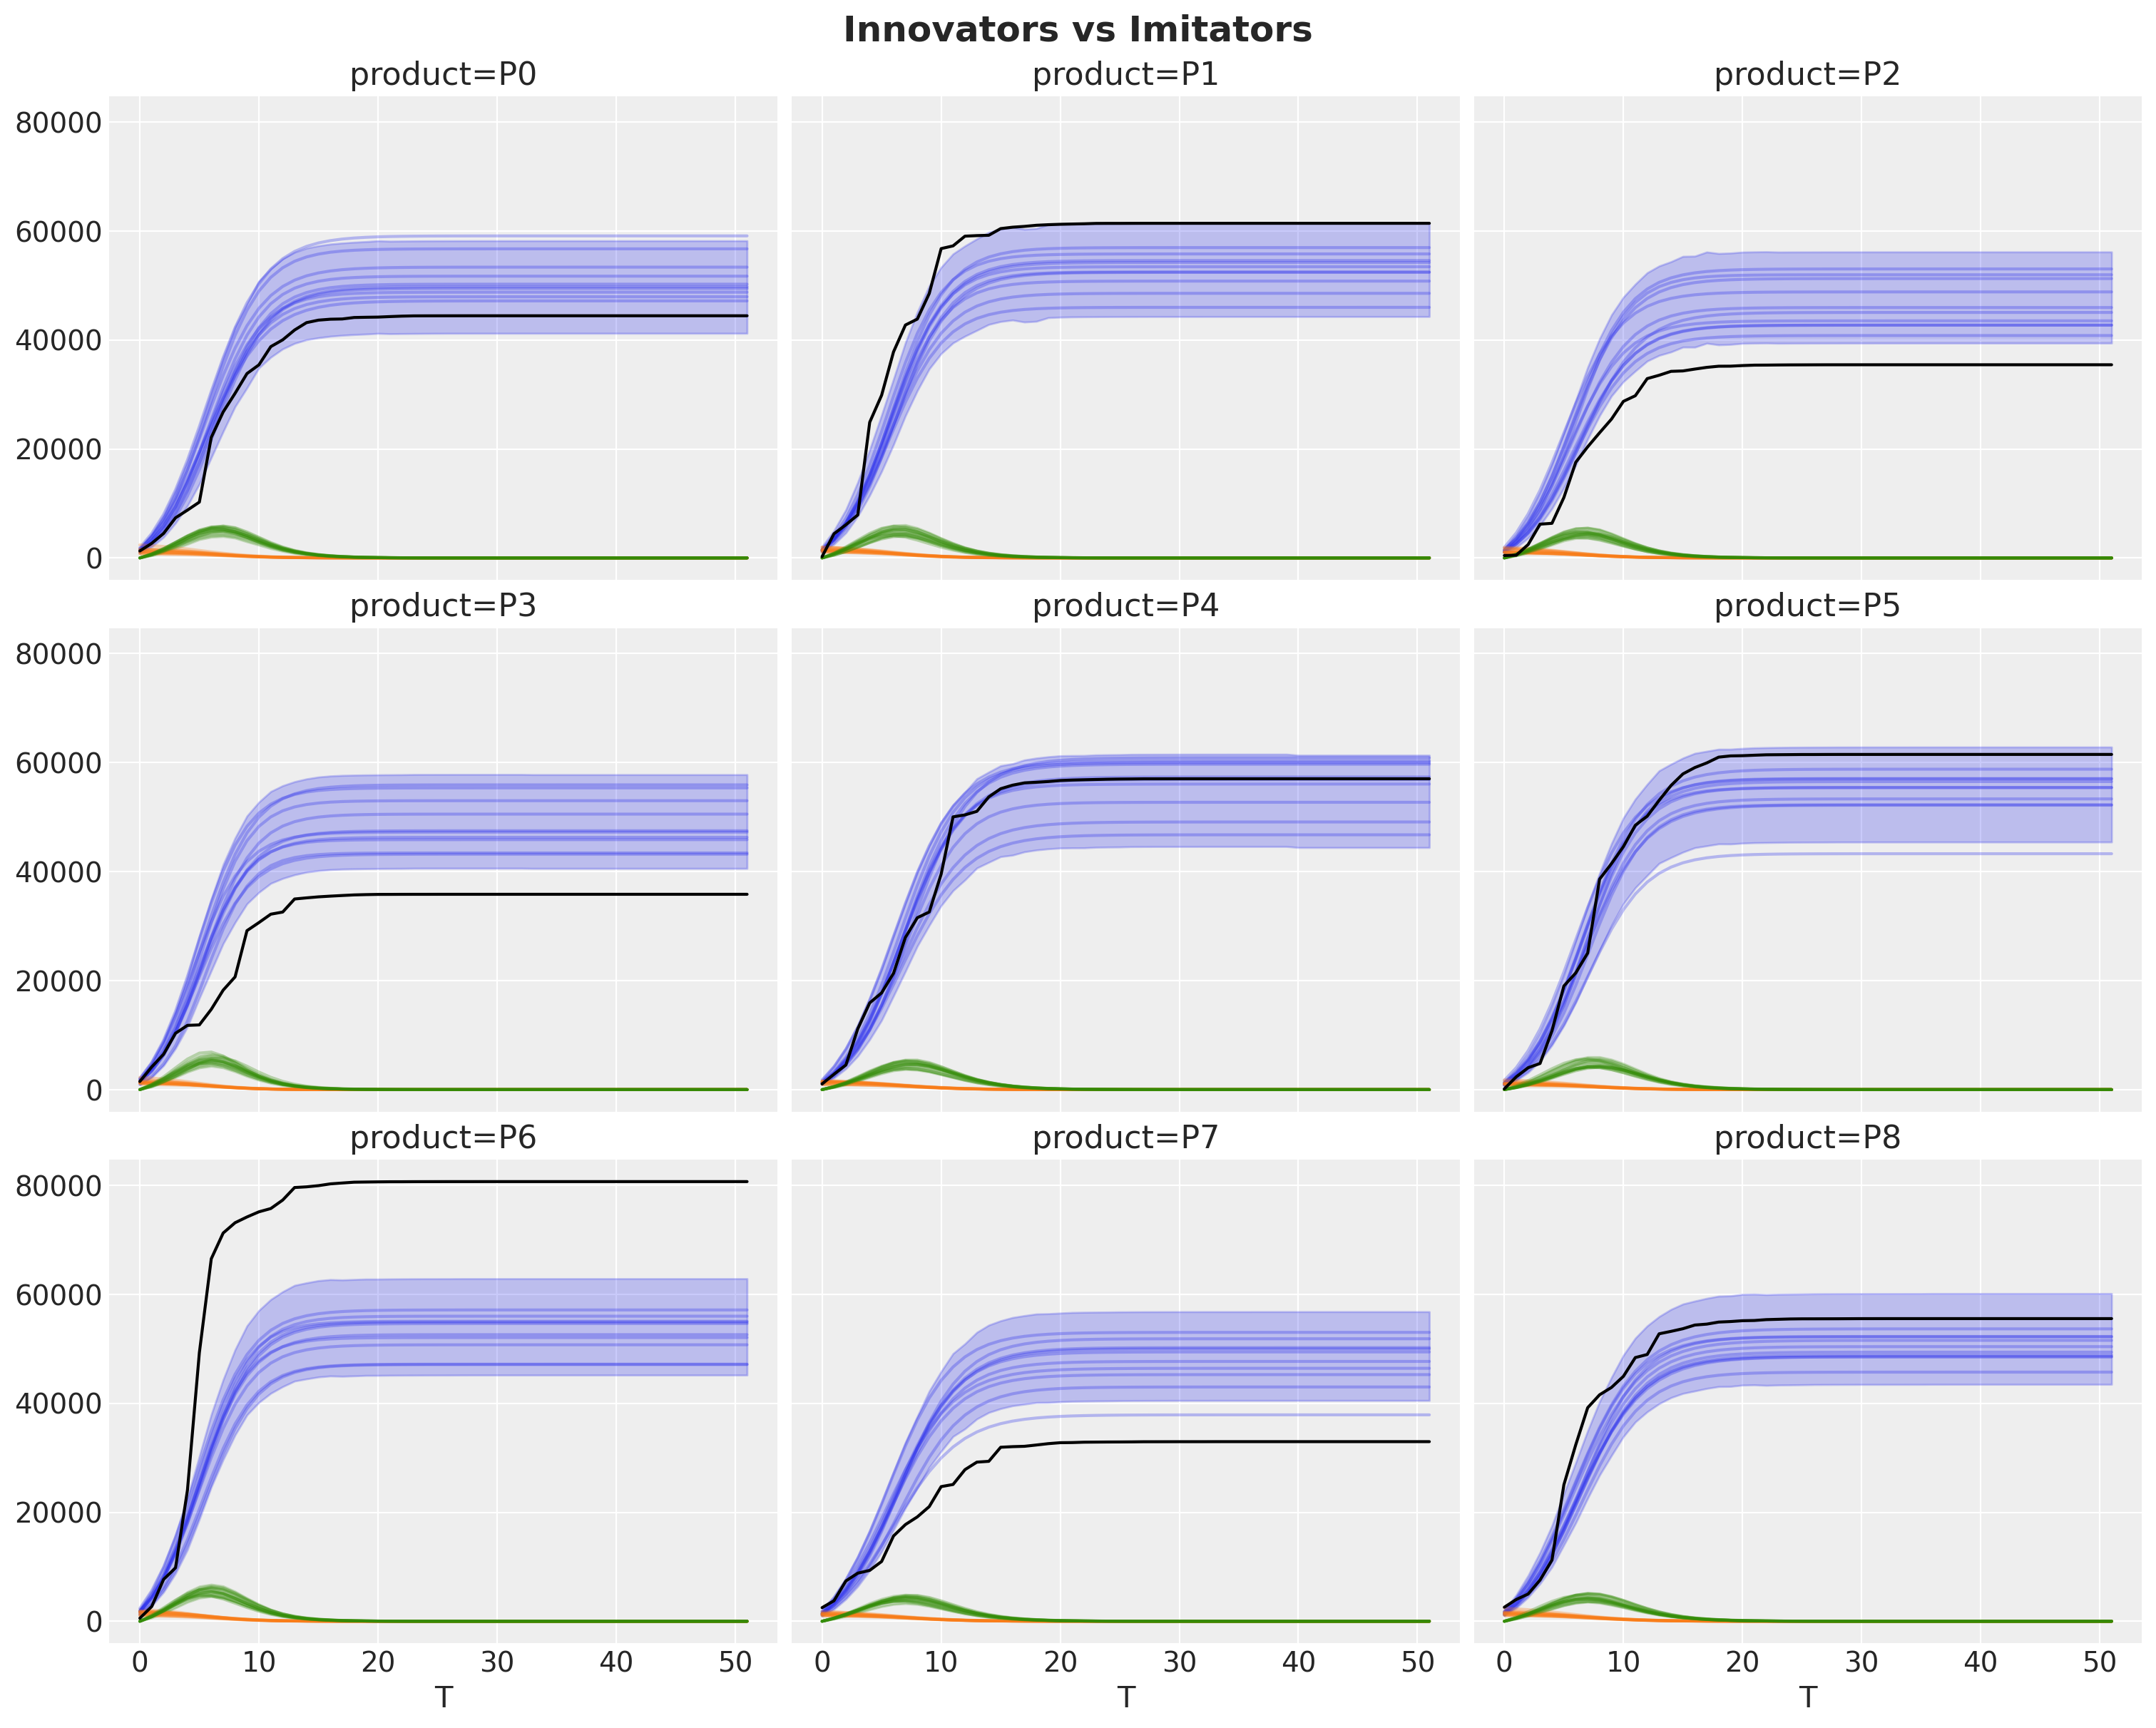

In [20]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].cumsum(dim="T").pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C0"], axes=axes
)

idata["posterior"]["innovators"].pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C1"], axes=axes
)
idata["posterior"]["imitators"].pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C2"], axes=axes
)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle("Innovators vs Imitators", fontsize=18, fontweight="bold");

Finally, we can inspect the peak of the adoption curve. 

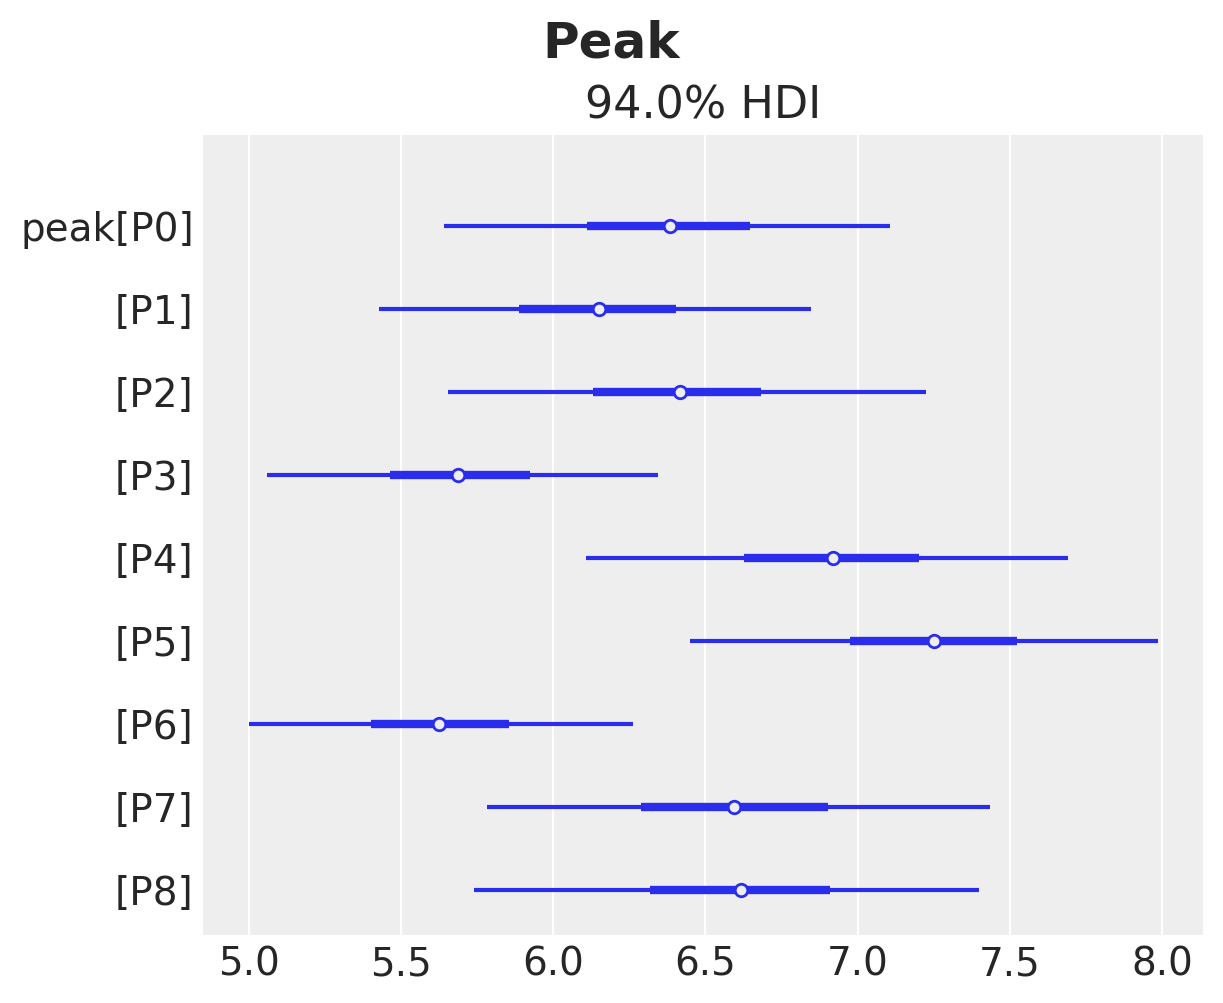

In [21]:
ax, *_ = az.plot_forest(idata["posterior"]["peak"], combined=True)
ax.get_figure().suptitle("Peak", fontsize=18, fontweight="bold");

This fits the observed data quite well. Let's see for example the product `P4`.

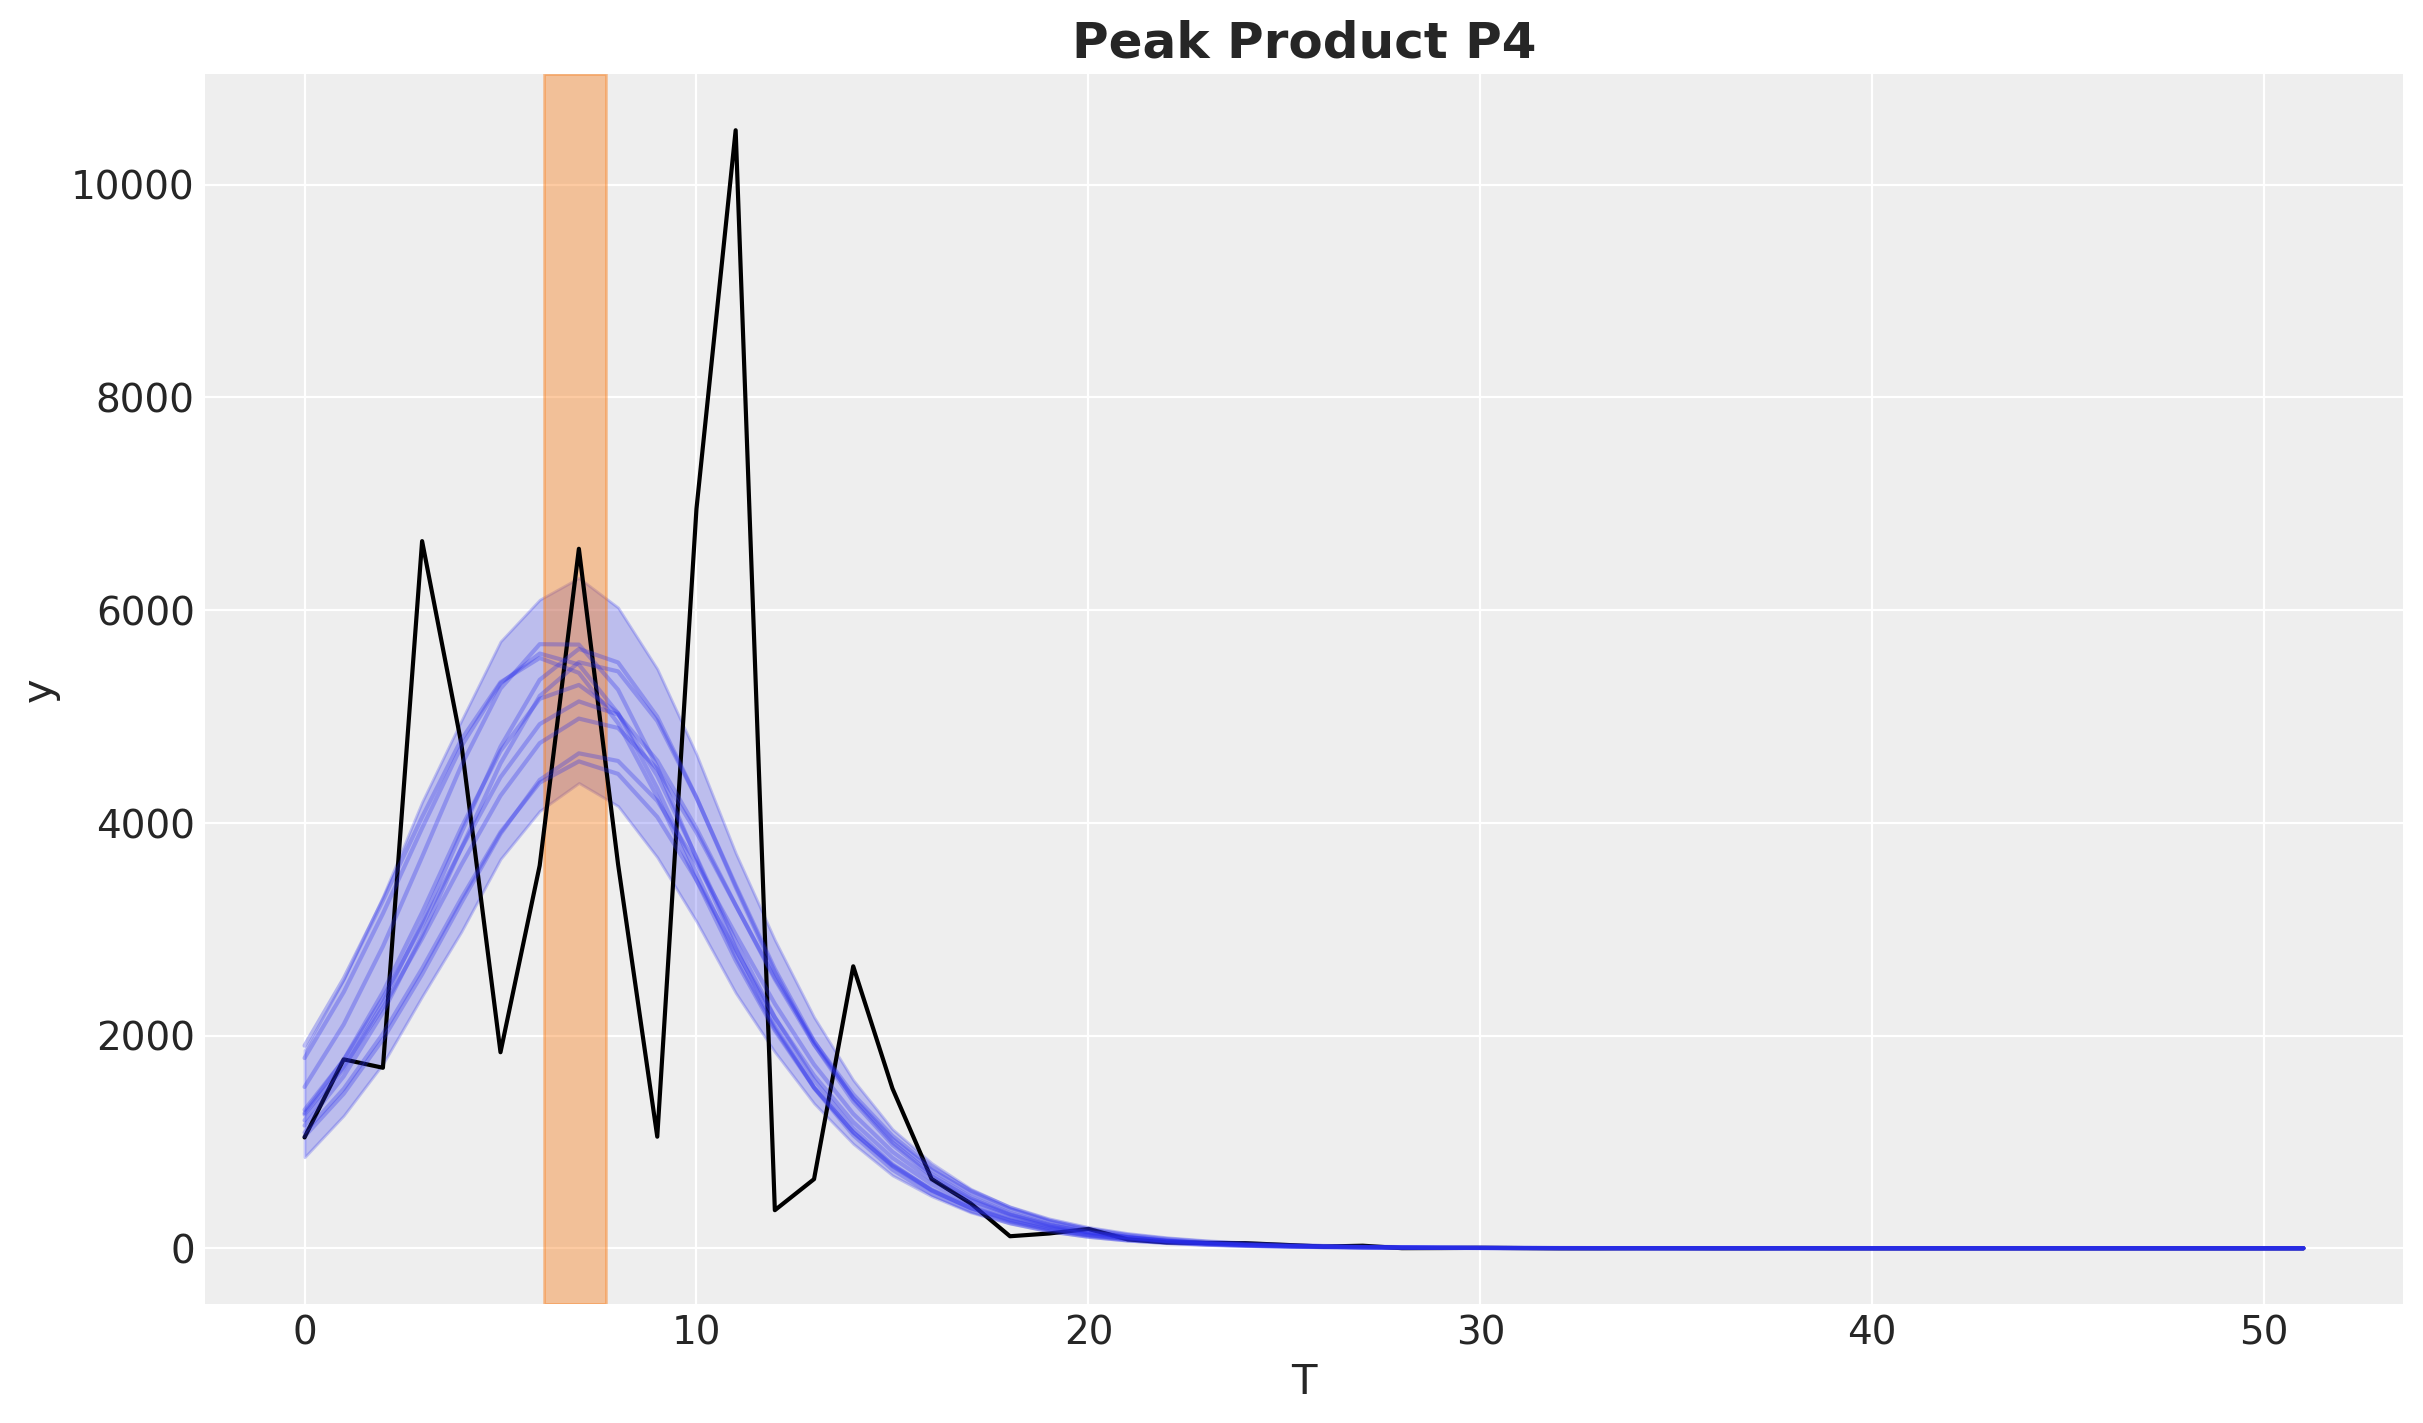

In [22]:
fig, ax = plt.subplots()

product_id = 4

bass_data[:, product_id].plot(ax=ax, color="black")

idata["posterior"]["adopters"].sel(product=f"P{product_id}").pipe(
    plot_curve, {"T"}, axes=ax
)

peak_hdi = az.hdi(idata["posterior"]["peak"].sel(product=f"P{product_id}"))["peak"]
ax.axvspan(
    peak_hdi.sel(hdi="lower").item(),
    peak_hdi.sel(hdi="higher").item(),
    color="C1",
    alpha=0.4,
)

ax.set_title(f"Peak Product {products[product_id]}", fontsize=18, fontweight="bold");

In [23]:
%load_ext watermark
%watermark -n -u -v -iv -w -p nutpie,pymc_marketing,pytensor

Last updated: Wed May 21 2025

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.34.0

nutpie        : 0.14.3
pymc_marketing: 0.13.1
pytensor      : 2.30.3

matplotlib    : 3.10.1
pymc_marketing: 0.13.1
pandas        : 2.2.3
numpy         : 1.26.4
xarray        : 2025.3.1
pymc          : 5.22.0
arviz         : 0.21.0

Watermark: 2.5.0

